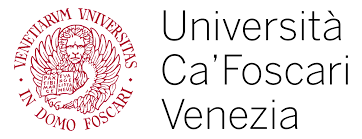

 

<center><h1> ARTIFICIAL INTELLIGENCE: KNOWLEDGE REPRESENTATION AND PLANNING CM 0472-1 </h1></center>
<center><h2> <i>ASSIGNMENT 2</i> </h2></center>



<div>Student: Giosuè Zannini matr. 873810</div>
<div>Academic year 2021/2022</div>

## Index

* [1 Analisis phase](#1)
    * [1.1 Look at the dataset](#1.1)
    * [1.2 Transform dataset by TF-IDF](#1.2)
        * [1.2.1 Visualization of distribution for each feature](#1.2.1)
        * [1.2.2 Display of class difference for each feature](#1.2.2)
        * [1.2.3 Correlation among variables](#1.2.3)
* [2 KNN](#2)
* [3 SVM](#3)
    * [3.1 Linear](#3.1)
    * [3.2 Polynomial](#3.2)
    * [3.3 RBF](#3.3)
* [4 Naive Bayes](#4)
    * [4.1 Visualization of assumptions required from Naive Bayes](#4.1)

In [1]:
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None) #admit to print all dataset
import numpy as np
import csv
import math
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, fbeta_score, make_scorer, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

<a id="1"/></a>
## 1 Analisis phase


In [2]:
# Functions to create DB

# create db from dataset
def create_db(relative_path_data, relative_path_col_names):
    # reading csv column name
    with open(relative_path_col_names) as csvfile:
        # list to hold column name
        tmp_col = []
        # extracting data row by row
        for row in csv.reader(csvfile):
            if len(row) != 0 and row[0][0] != '|' and row[0][0] != '1':
                str_tmp = ''.join(str(s) for s in row)
                tmp = str_tmp.split(':')
                tmp_col.append(tmp[0])
        tmp_col.append("is_spam")

    # reading csv dataset
    with open(relative_path_data) as csvfile:
        # list to hold data
        tmp_data = []
        # extracting data row by row
        for row in csv.reader(csvfile):
            # transform data from string to float
            tmp_data.append([float(val) for val in row])
    # create data set
    df = pd.DataFrame(tmp_data)
    # renaming columns
    df.columns = tmp_col
    # drop columns that we don't use
    df.drop(df.columns[-2:-5:-1], inplace=True, axis=1)
    return df

# make the transformation on dataset to get tf-idf format
def make_tf_idf(df):
    df_tf_idf = df.copy()
    # for each column without the last
    for col_name in df.columns[-2::-1]:
        # take count of docs that contain this specific word
        tmp_number_of_occurrences = 0
        # for each word
        for val in df[col_name]:
            if val != 0:
                tmp_number_of_occurrences += 1
        # multiply tdf with idf for each word
        df_tf_idf[col_name] *= math.log10(len(df_tf_idf)/tmp_number_of_occurrences)
    return df_tf_idf


In [3]:
# create dataset
DB = create_db("DataSet/spambase.data", "DataSet/spambase.names")

<a id="1.1"/></a>
### 1.1 Look at the dataset

In [4]:
DB.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,1.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,1.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,1.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,1.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,1.0


Summary:

In [5]:
DB.describe()[DB.columns.difference(["is_spam"])].iloc[1::]

,char_freq_!,char_freq_#,char_freq_$,char_freq_(,char_freq_;,char_freq_[,word_freq_000,word_freq_1999,word_freq_3d,word_freq_415,word_freq_650,word_freq_85,word_freq_857,word_freq_address,word_freq_addresses,word_freq_all,word_freq_business,word_freq_conference,word_freq_credit,word_freq_cs,word_freq_data,word_freq_direct,word_freq_edu,word_freq_email,word_freq_font,word_freq_free,word_freq_george,word_freq_hp,word_freq_hpl,word_freq_internet,word_freq_lab,word_freq_labs,word_freq_mail,word_freq_make,word_freq_meeting,word_freq_money,word_freq_order,word_freq_original,word_freq_our,word_freq_over,word_freq_parts,word_freq_people,word_freq_pm,word_freq_project,word_freq_re,word_freq_receive,word_freq_remove,word_freq_report,word_freq_table,word_freq_technology,word_freq_telnet,word_freq_will,word_freq_you,word_freq_your
mean,0.269071,0.044238,0.075811,0.139030,0.038575,0.016976,0.101645,0.136953,0.065425,0.047835,0.124845,0.105412,0.047048,0.213015,0.049205,0.280656,0.142586,0.031869,0.085577,0.043667,0.097229,0.064834,0.179824,0.184745,0.121202,0.248848,0.767305,0.549504,0.265384,0.105295,0.098915,0.102852,0.239413,0.104553,0.132339,0.094269,0.090067,0.046099,0.312223,0.095901,0.013201,0.093930,0.078629,0.079196,0.301224,0.059824,0.114208,0.058626,0.005444,0.097477,0.064753,0.541702,1.662100,0.809761
std,0.815672,0.429342,0.245882,0.270355,0.243471,0.109394,0.350286,0.423451,1.395151,0.329445,0.538576,0.532260,0.328559,1.290575,0.258843,0.504143,0.444055,0.285735,0.509767,0.361205,0.555907,0.349916,0.911119,0.531122,1.025756,0.825792,3.367292,1.671349,0.886955,0.401071,0.593327,0.456682,0.644755,0.305358,0.766819,0.442636,0.278616,0.223812,0.672513,0.273824,0.220651,0.301036,0.434672,0.621976,1.011687,0.201545,0.391441,0.335184,0.076274,0.402623,0.403393,0.861698,1.775481,1.200810
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,1.310000,0.220000
75%,0.315000,0.000000,0.052000,0.188000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,2.640000,1.270000
max,32.478000,19.829000,6.003000,9.752000,4.385000,4.081000,5.450000,6.890000,42.810000,4.760000,9.090000,20.000000,4.760000,14.280000,4.410000,5.100000,7.140000,10.000000,18.180000,7.140000,18.180000,4.760000,22.050000,9.090000

<a id="1.2"/></a>
### 1.2 Transform dataset by TF-IDF

In [4]:
# apply tf-idf transformation
DB_tf_idf = make_tf_idf(DB)

In [7]:
DB_tf_idf.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,is_spam
0,0.000000,0.454129,0.247584,0.0,0.134499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.189715,0.000000,0.000000,0.000000,0.182106,0.000000,0.834185,0.297323,0.000000,0.267359,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.240502,0.000000,0.000000,1.0
1,0.134489,0.198681,0.193425,0.0,0.058844,0.185720,0.158756,0.052285,0.000000,0.515347,0.170563,0.234179,0.476068,0.233139,0.159112,0.079671,0.047546,0.181063,0.534565,0.000000,0.442813,0.0,0.357322,0.342523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052101,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.030239,0.0,0.114996,0.093010,0.037814,1.0
2,0.038425,0.000000,0.274664,0.0,0.516982,0.126024,0.143636,0.089631,0.495791,0.137060,0.308638,0.133393,0.087890,0.000000,1.988898,0.034145,0.040754,0.666055,0.209512,0.331356,0.142034,0.0,0.963940,0.047794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.060405,0.0,0.0,0.130659,0.0,0.032715,0.056962,0.0,0.0,0.007652,0.032759,0.0,0.085319,0.095077,0.007878,1.0
3,0.000000,0.000000,0.000000,0.0,0.264796,0.000000,0.234353,0.470563,0.240149,0.345392,0.251784,0.091893,0.227048,0.000000,0.000000,0.176415,0.000000,0.000000,0.489889,0.000000,0.086335,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.031384,0.0,0.042351,0.000000,0.000000,1.0
4,0.000000,0.000000,0.000000,0.0,0.264796,0.000000,0.234353,0.470563,0.240149,0.345392,0.251784,0.091893,0.227048,0.000000,0.000000,0.176415,0.000000,0.000000,0.489889,0.000000,0.086335,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.030926,0.0,0.041732,0.000000,0.000000,1.0


Summary:

In [8]:
DB_tf_idf.describe()[DB_tf_idf.columns.difference(["is_spam"])].iloc[1::]

,char_freq_!,char_freq_#,char_freq_$,char_freq_(,char_freq_;,char_freq_[,word_freq_000,word_freq_1999,word_freq_3d,word_freq_415,word_freq_650,word_freq_85,word_freq_857,word_freq_address,word_freq_addresses,word_freq_all,word_freq_business,word_freq_conference,word_freq_credit,word_freq_cs,word_freq_data,word_freq_direct,word_freq_edu,word_freq_email,word_freq_font,word_freq_free,word_freq_george,word_freq_hp,word_freq_hpl,word_freq_internet,word_freq_lab,word_freq_labs,word_freq_mail,word_freq_make,word_freq_meeting,word_freq_money,word_freq_order,word_freq_original,word_freq_our,word_freq_over,word_freq_parts,word_freq_people,word_freq_pm,word_freq_project,word_freq_re,word_freq_receive,word_freq_remove,word_freq_report,word_freq_table,word_freq_technology,word_freq_telnet,word_freq_will,word_freq_you,word_freq_your
mean,0.083177,0.034850,0.039173,0.031849,0.029518,0.015947,0.084465,0.101934,0.130245,0.063641,0.124504,0.102999,0.063567,0.151150,0.055922,0.108572,0.096848,0.043194,0.088614,0.065176,0.102615,0.065272,0.170718,0.119466,0.193277,0.141615,0.591406,0.343674,0.200054,0.078647,0.108046,0.101996,0.131256,0.066958,0.149556,0.075091,0.069773,0.050193,0.131231,0.063610,0.023020,0.068795,0.084803,0.090941,0.164242,0.048589,0.086339,0.065086,0.010146,0.086308,0.077444,0.160576,0.256052,0.225517
std,0.252147,0.338232,0.127053,0.061934,0.186310,0.102765,0.291082,0.315174,2.777404,0.438299,0.537106,0.520077,0.443915,0.915761,0.294179,0.195028,0.301614,0.387272,0.527857,0.539131,0.586703,0.352279,0.864982,0.343453,1.635738,0.469942,2.595366,1.045305,0.668615,0.299570,0.648096,0.452882,0.353482,0.195558,0.866581,0.352588,0.215836,0.243691,0.282664,0.181624,0.384765,0.220482,0.468803,0.714217,0.551622,0.163696,0.295921,0.372116,0.142138,0.356493,0.482451,0.255433,0.273519,0.334424
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.014890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029643,0.201810,0.061270
75%,0.097375,0.000000,0.026870,0.043067,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.162477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056908,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087719,0.000000,0.000000,0.000000,0.000000,0.000000,0.159718,0.000000,0.000000,0.000000,0.000000,0.000000,0.059977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.237143,0.406701,0.353694
max,10.039869,15.621107,3.101895,2.234012,3.355512,3.833677,4.528854,5.128211,85.224195,6.332770,9.065196,19.542210,6.431228,10.132744,5.012022,1.972936,4.849673,13.553562,18.825142,10.657096,19.187121,4.792149,20.933425,5.87809

Word frequency for all documents:

In [20]:
pd.DataFrame((((DB_tf_idf[DB_tf_idf.columns.difference(["is_spam"])] > 0).sum()/len(DB_tf_idf)).to_numpy()).reshape(1,-1), columns=DB_tf_idf.columns.difference(["is_spam"]))

,char_freq_!,char_freq_#,char_freq_$,char_freq_(,char_freq_;,char_freq_[,word_freq_000,word_freq_1999,word_freq_3d,word_freq_415,word_freq_650,word_freq_85,word_freq_857,word_freq_address,word_freq_addresses,word_freq_all,word_freq_business,word_freq_conference,word_freq_credit,word_freq_cs,word_freq_data,word_freq_direct,word_freq_edu,word_freq_email,word_freq_font,word_freq_free,word_freq_george,word_freq_hp,word_freq_hpl,word_freq_internet,word_freq_lab,word_freq_labs,word_freq_mail,word_freq_make,word_freq_meeting,word_freq_money,word_freq_order,word_freq_original,word_freq_our,word_freq_over,word_freq_parts,word_freq_people,word_freq_pm,word_freq_project,word_freq_re,word_freq_receive,word_freq_remove,word_freq_report,word_freq_table,word_freq_technology,word_freq_telnet,word_freq_will,word_freq_you,word_freq_your
0,0.490763,0.163008,0.304282,0.590089,0.171702,0.114975,0.147577,0.180178,0.010215,0.046729,0.10063,0.105412,0.044556,0.195175,0.073028,0.410346,0.209302,0.044121,0.092154,0.032167,0.088024,0.098457,0.112367,0.225603,0.025429,0.269724,0.169528,0.236905,0.176266,0.179092,0.080852,0.101934,0.282982,0.228863,0.074114,0.159748,0.168007,0.081504,0.379917,0.217127,0.01804,0.185177,0.08346,0.071072,0.284938,0.154097,0.175397,0.077592,0.013693,0.130189,0.063682,0.505325,0.701369,0.526625


<a id="1.2.1"/></a>
#### 1.2.1 Visualization of distribution for each feature

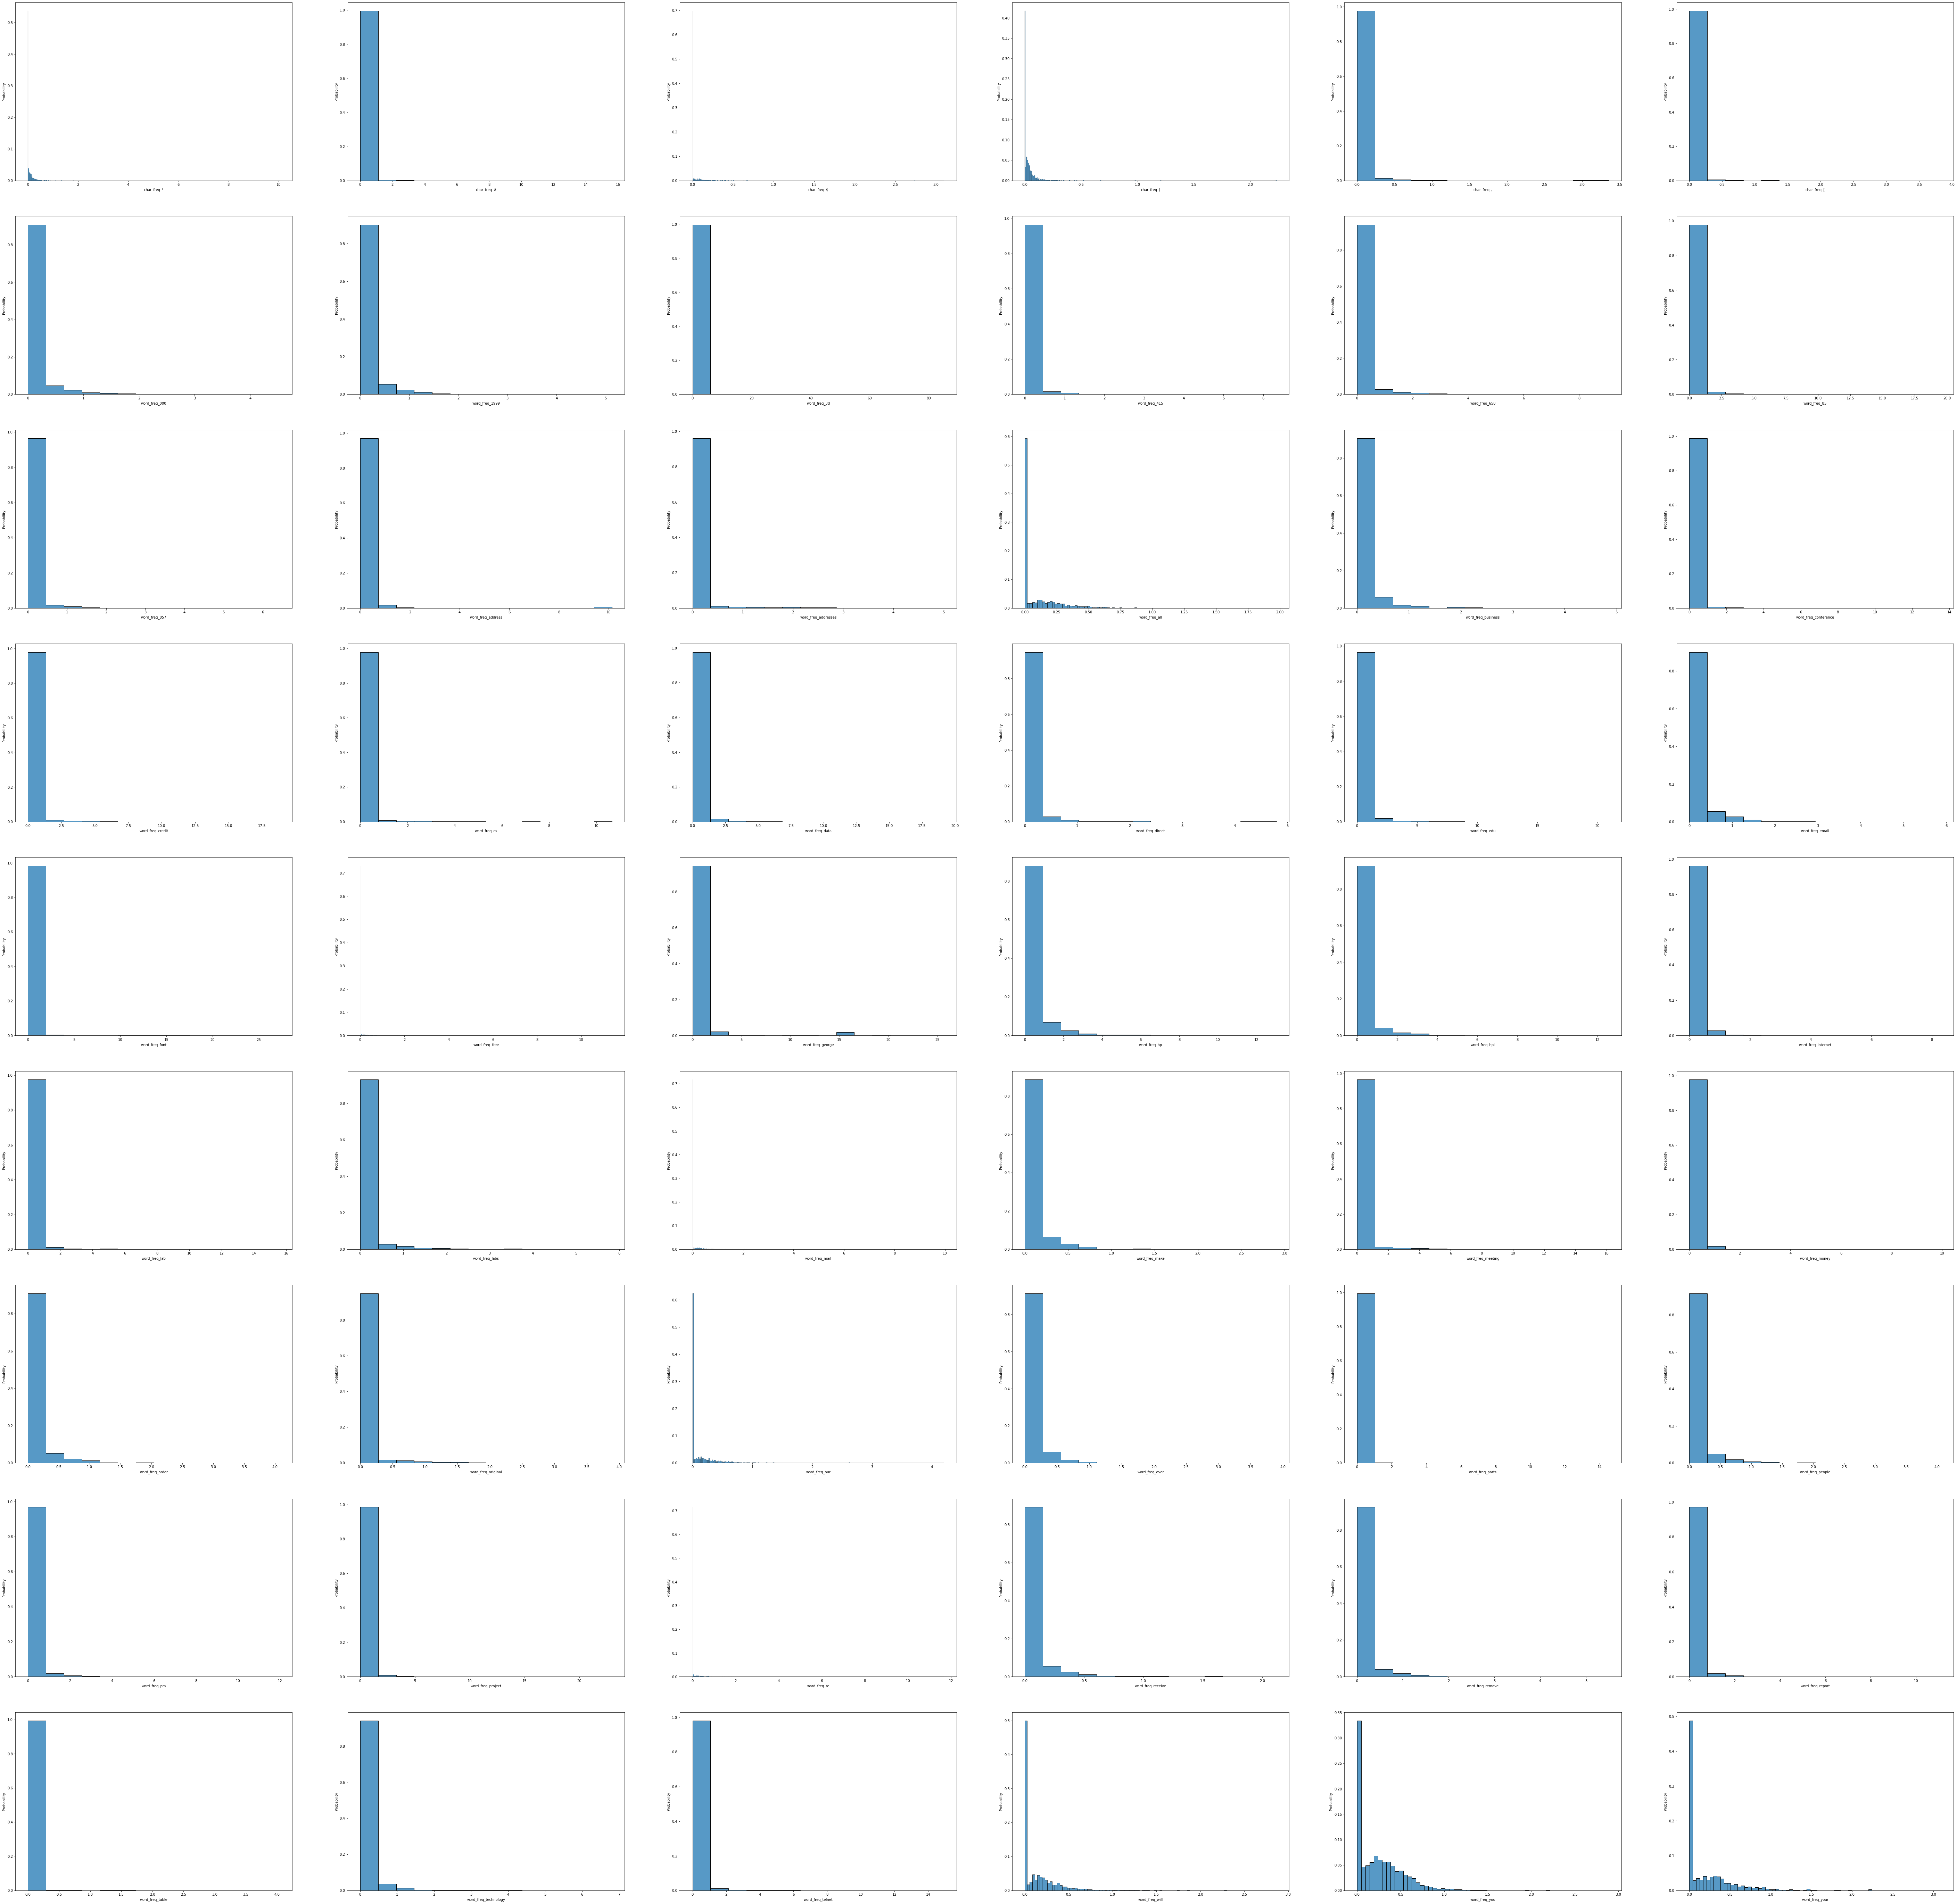

In [76]:
fig, axs = plt.subplots(nrows = 9, ncols = 6, figsize=(100,100))
row_n = 0
col_n = 0
for col in DB_tf_idf.columns.difference(["is_spam"]):
    if col_n != 0 and col_n%6==0:
        row_n += 1
    sn.histplot(DB_tf_idf[col], stat="probability", ax = axs[row_n, col_n%6])
    col_n += 1

<a id="1.2.2"/></a>
#### 1.2.2 Display of class difference for each feature

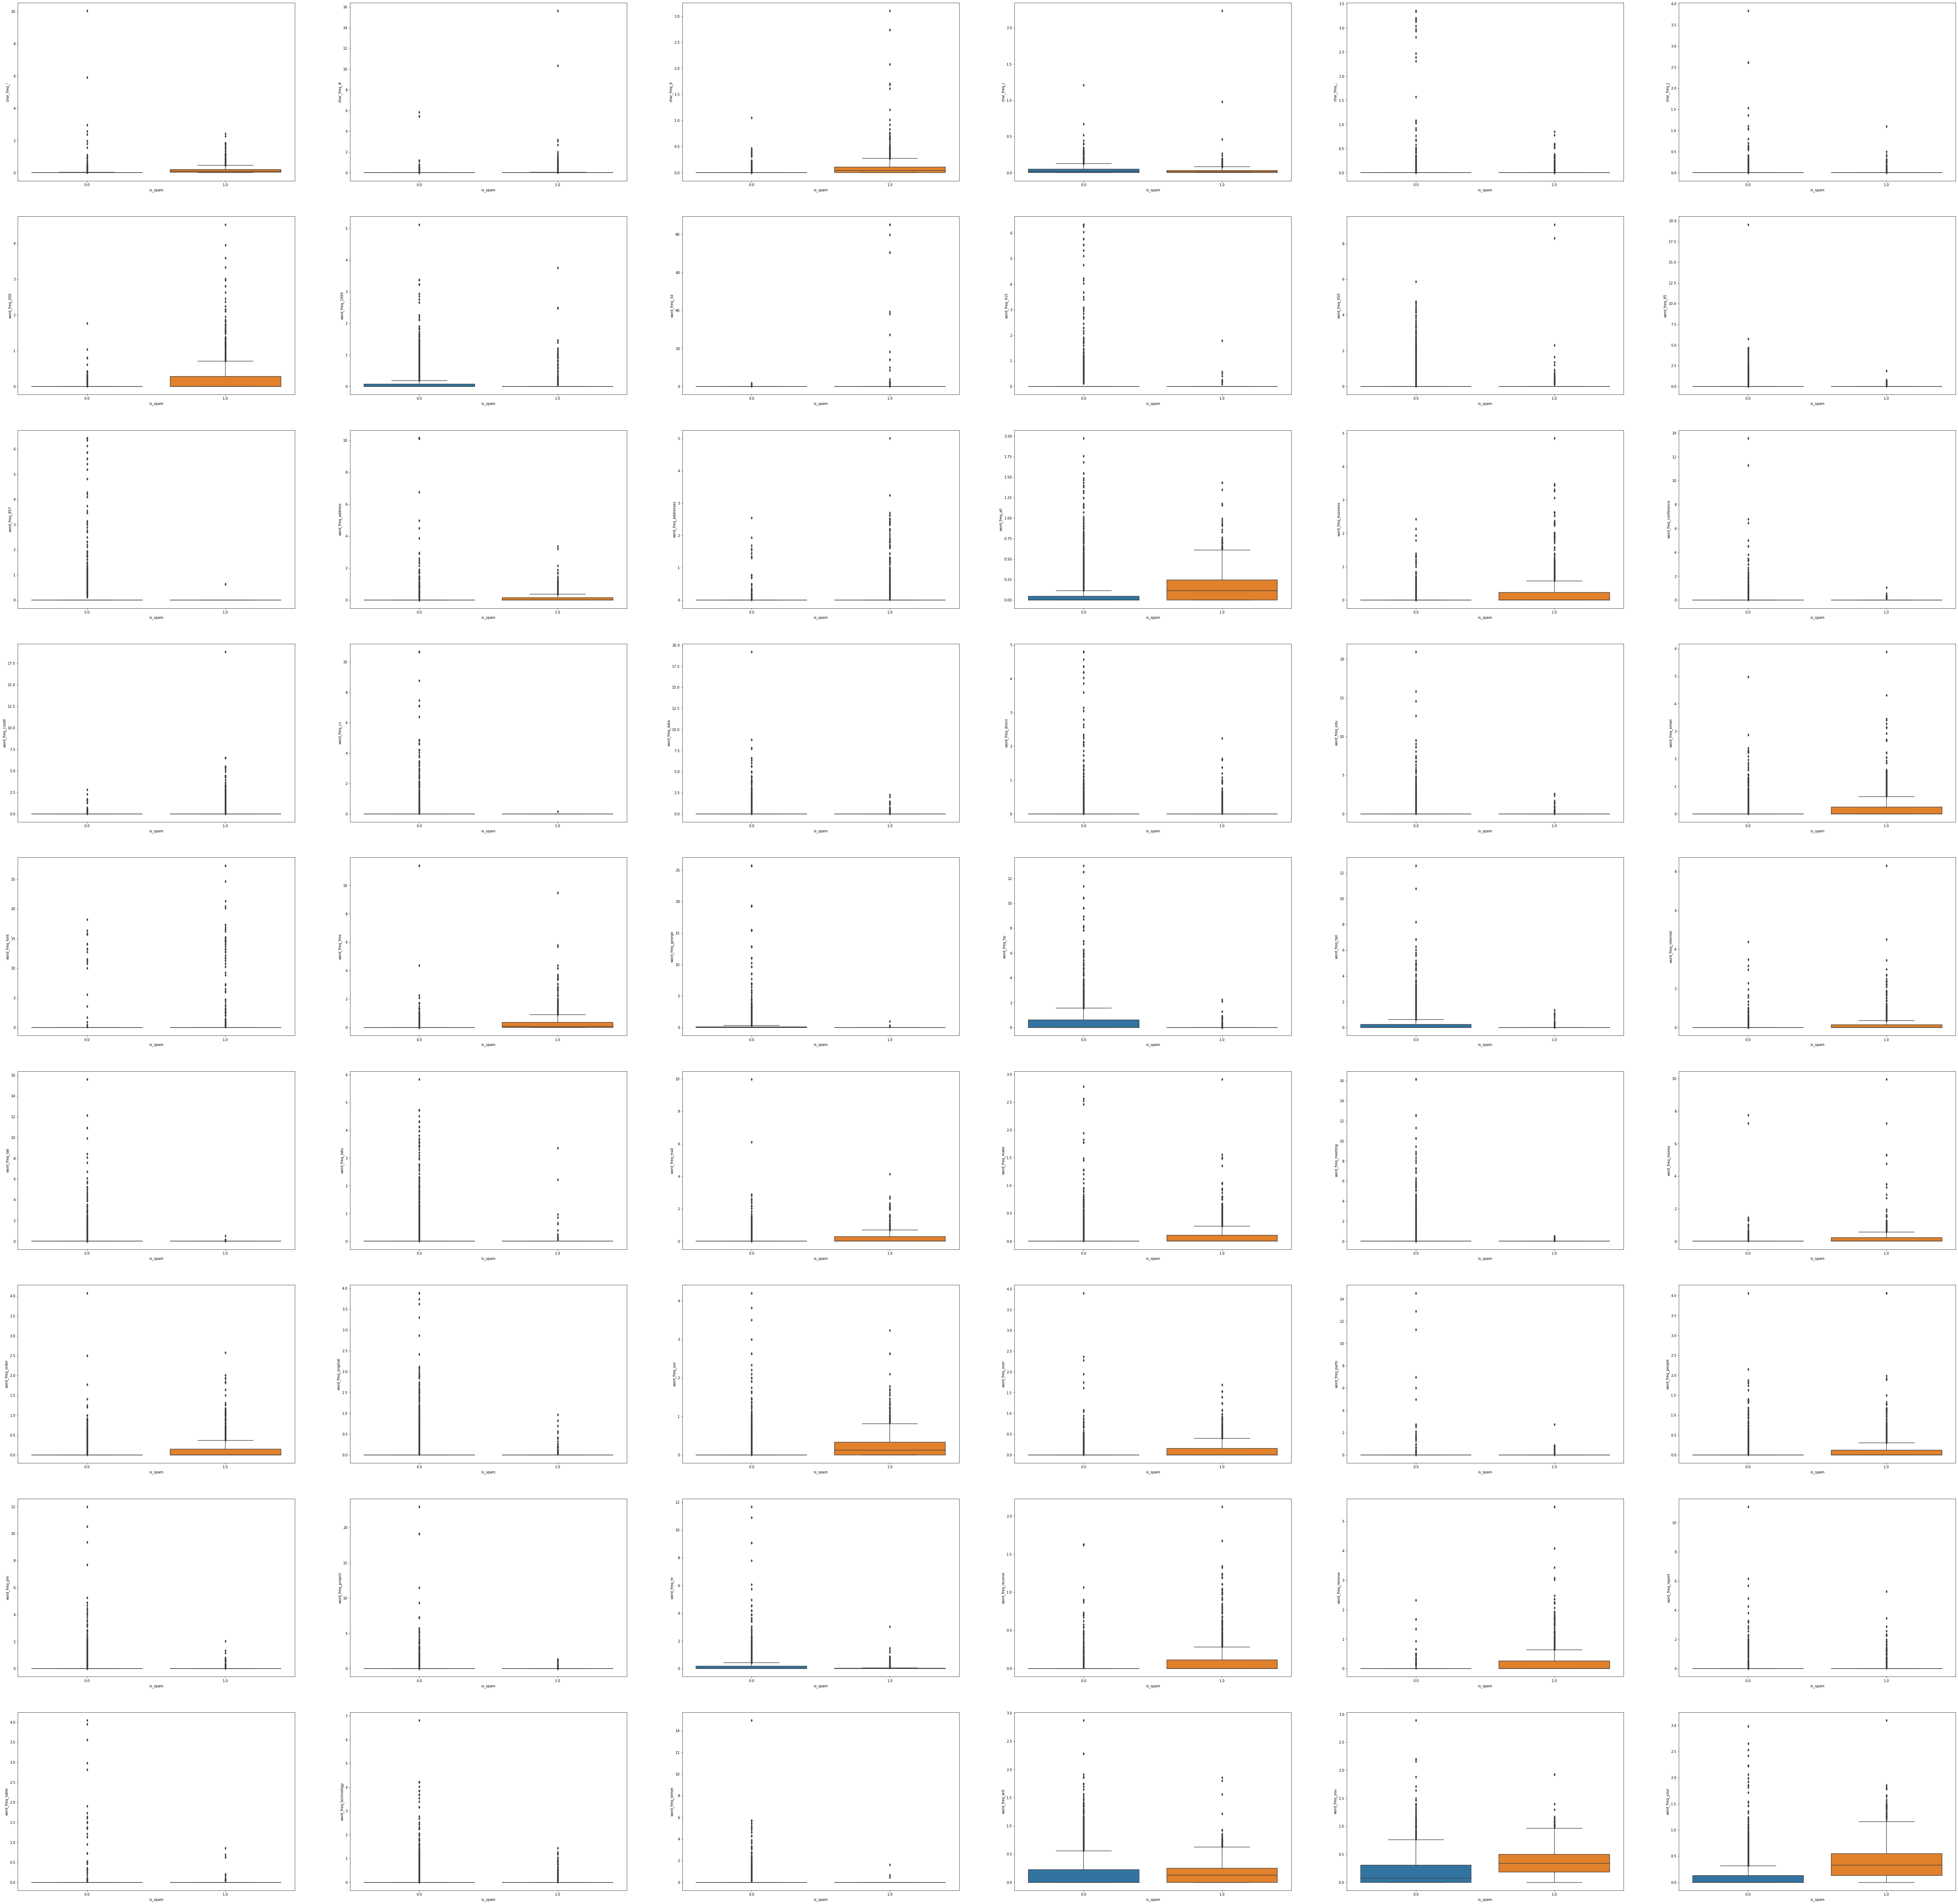

In [19]:
fig, axs = plt.subplots(nrows = 9, ncols = 6, figsize=(100,100))
row_n = 0
col_n = 0
for col in DB_tf_idf.columns.difference(["is_spam"]):
    if col_n != 0 and col_n%6==0:
        row_n += 1
    sn.boxplot(x = DB_tf_idf["is_spam"], y = DB_tf_idf[col], ax = axs[row_n, col_n%6])
    col_n += 1

<a id="1.2.3"/></a>
#### 1.2.3 Correlation among variables

<AxesSubplot:>

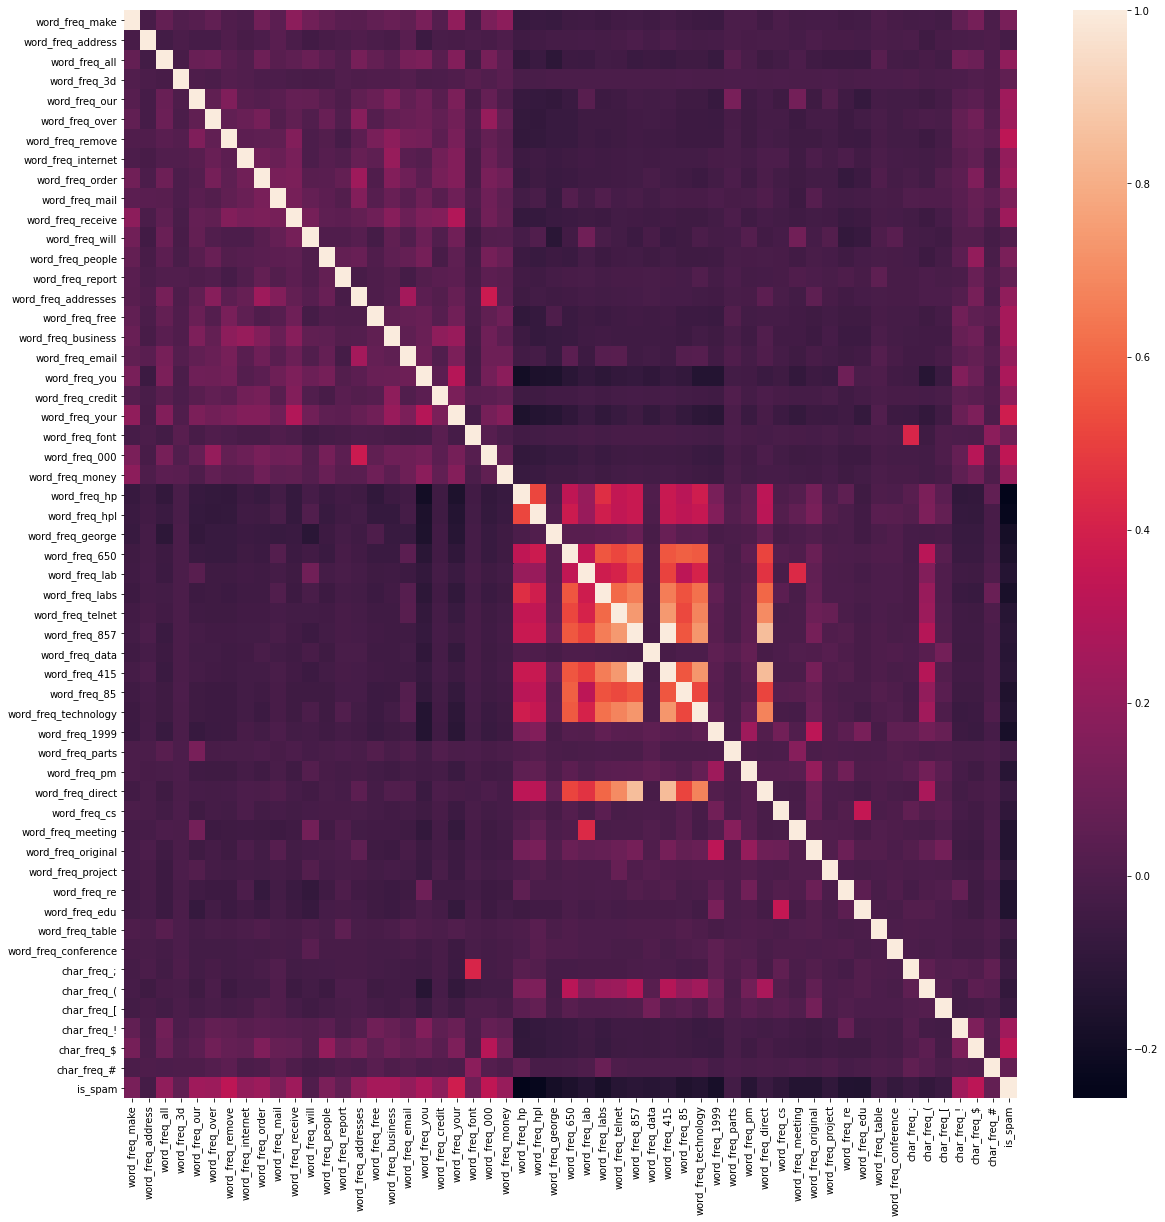

In [8]:
f, ax = plt.subplots(1, 1, figsize = (20, 20))
sn.heatmap(DB_tf_idf[DB_tf_idf.columns].corr(), ax=ax)

<a id="2"/></a>
## 2 KNN

In [67]:
# determine various metric with different hyperparameters to find the best configuration for the classifier
def find_right_knn(emphasy = 0.2):
    # split train set in train and validation
    x_train, x_test, y_train, y_test = train_test_split(DB_tf_idf[DB_tf_idf.columns.difference(["is_spam"])],
                                                    DB_tf_idf["is_spam"], test_size=0.33, random_state=42)
    # vector to plot
    v_precision=[]; v_recall=[]; v_f1=[]; v_accuracy=[]
    # all neighborn that I want to try
    all_neighborns = range(1, 50, 2)
    for metric in [1,2]:
        tmp_precision=[];tmp_recall=[]; tmp_f1=[]; tmp_accuracy=[]
        for n in all_neighborns:
            # create instance of classificator
            knn_tmp = KNeighborsClassifier(n_neighbors=n, p=metric)
            # make a custom scorer for a measure (more enphasy about precision)
            ftwo_scorer = make_scorer(fbeta_score, beta=emphasy)
            # various measures for each distance
            tmp_accuracy.append(cross_val_score(knn_tmp, x_train, y_train, cv=10, scoring='accuracy').mean())
            tmp_precision.append(cross_val_score(knn_tmp, x_train, y_train, cv=10, scoring='precision').mean())
            tmp_recall.append(cross_val_score(knn_tmp, x_train, y_train, cv=10, scoring='recall').mean())
            tmp_f1.append(cross_val_score(knn_tmp, x_train, y_train, cv=10, scoring=ftwo_scorer).mean())
        # add measures to plot vectors
        v_precision.append(tmp_precision)
        v_recall.append(tmp_recall)
        v_f1.append(tmp_f1)
        v_accuracy.append(tmp_accuracy)
    best_result_knn(all_neighborns, v_accuracy, v_precision, v_recall, v_f1, x_train, x_test, y_train, y_test)
    plot_report_knn(all_neighborns, v_accuracy, v_precision, v_recall, v_f1)
    
    
# plot the results    
def plot_report_knn(neighbourns, v_a, v_p, v_r, v_f1):
    # make figure
    fig = plt.figure(constrained_layout=False, figsize=(15, 10))
    # make grid of plots
    gs = fig.add_gridspec(nrows=11, ncols=3)  
    # determine number of subplot
    axs = [fig.add_subplot(gs[0:5, 0:3]), fig.add_subplot(gs[6:11, 0:3])]
    # title of main graphic
    fig.suptitle('KNN')
    for i, ax in enumerate(axs): #prima riga
        ax.plot(neighbourns, v_a[i], label="accuracy", color="lightcoral")
        ax.plot(neighbourns, v_p[i], label="precision", color="lightgreen")
        ax.plot(neighbourns, v_r[i], label="recall", color="teal")
        ax.plot(neighbourns, v_f1[i], label="f1", color="orchid")
        ax.set_ylabel("Percentage")
        ax.set_xlabel("Neighbors")
        ax.set_xticks(neighbourns)
        # min of all measures
        compute_min = min(min(v_a[i]), min(v_p[i]), min(v_r[i]), min(v_f1[i]))
        # max of all measures
        compute_max = max(max(v_a[i]), max(v_p[i]), max(v_r[i]), max(v_f1[i]))
        # margin of increment that I want for these graphics
        margin_of_increment = (compute_max - compute_min)/10
        # set margins
        ax.set_yticks(np.arange(compute_min, compute_max+margin_of_increment, margin_of_increment))
        if i+1==1:
            ax.title.set_text("Manhattan distance")
        else:
            ax.title.set_text("Euclidean distance")
        ax.legend()
        
# find the best hyperparameters
def best_result_knn(neighbourns, v_a, v_p, v_r, v_f1, x_train, x_test, y_train, y_test):
    # list to take the best neighborn for each metric
    tmp_max=[]
    for a, f1 in zip(v_a, v_f1):
        # list that hold the sum of all metrics
        tmp_sum = [(x + y)/2 for x, y in zip(a, f1)]
        # list that contain a pair(pos_of_max, max_value)
        tmp_max.append((tmp_sum.index(max(tmp_sum)), max(tmp_sum)))
    # hold the tupla with the best hyperparameters (metric, neighborn)
    best = ()
    val= max(tmp_max[0][1], tmp_max[1][1])
    if val == tmp_max[0][1]:
        # the best is p=1 and the following neighbors
        best = (1, neighbourns[tmp_max[0][0]]) 
    else:
        # the best is p=2 and the following neighbors
        best = (2, neighbourns[tmp_max[1][0]]) 
    # create figure
    f, ax = plt.subplots(1, 1, figsize = (5, 5))
    # create instance of classifier
    knn = KNeighborsClassifier(n_neighbors=best[1], p=best[0])
    # train instance
    knn.fit(x_train, y_train)
    # predict the y_hat
    y_hat = knn.predict(x_test)
    # plot confusion matrix
    sn.heatmap(confusion_matrix(y_test, y_hat), annot=True, ax=ax, fmt="d", cmap="PiYG") 
    # define labels name
    ax.set_ylabel("True label")
    ax.set_xlabel("Predicted label")
    # print various metrics
    print("The best hyperparameters are: Neighbors =", best[1], "| Metric =", 
          'Manhattan distance' if best[0] == 1 else 'Euclidean distance')
    print("METRICS AT THE TEST TIME")
    print("Accuracy: ", accuracy_score(y_hat, y_test))
    print("Precision: ", recall_score(y_hat, y_test))
    print("Recall: ", precision_score(y_hat, y_test))
    print("F1_score: ", f1_score(y_hat, y_test))
    

The best hyperparameters are: Neighbors = 3 | Metric = Euclidean distance
METRICS AT THE TEST TIME
Accuracy:  0.9111257406188282
Precision:  0.8952380952380953
Recall:  0.8909952606635071
F1_score:  0.8931116389548693


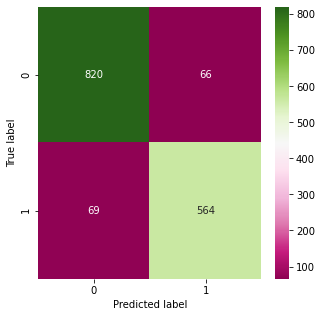

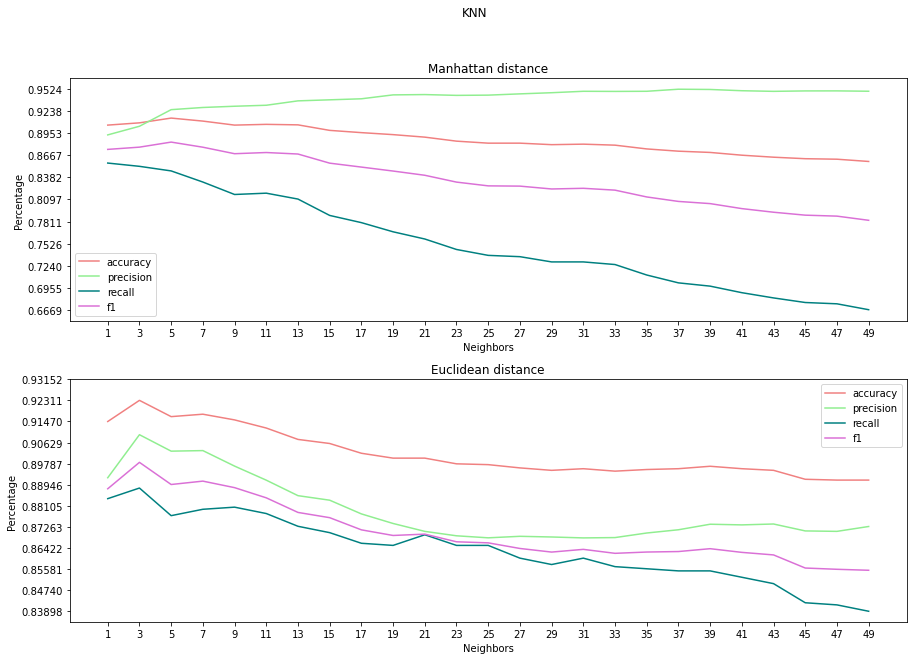

In [69]:
find_right_knn(1)

Thanks to this test I noticed that false positives are very high. This fact is not correct because from the user’s point of view it is serious to identify a normal email as spam. So I decided to put more emphasis on precision and this way I’m going to reduce this phenomenon. From now on I will execute this reasoning for all the methods of classification.


The best hyperparameters are: Neighbors = 13 | Metric = Manhattan distance
METRICS AT THE TEST TIME
Accuracy:  0.9032258064516129
Precision:  0.948339483394834
Recall:  0.8120063191153238
F1_score:  0.8748936170212765


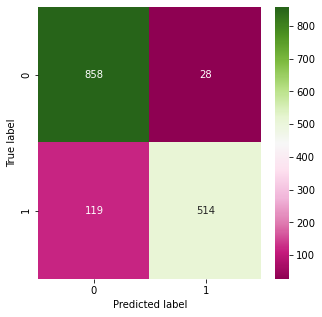

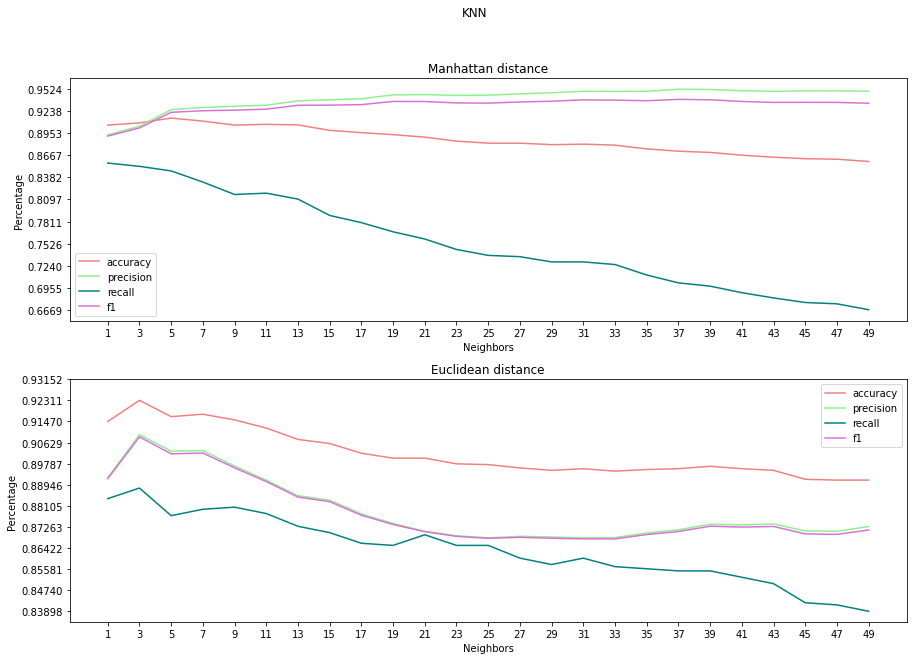

In [68]:
find_right_knn()

<a id="3"/></a>
## 3 SVM

In [70]:
# determine various metric with different hyperparameters to find the best configuration for the classifier
def find_right_svm_linear(emphasy = 0.2):
    # split train set in train and validation
    x_train, x_test, y_train, y_test = train_test_split(DB_tf_idf[DB_tf_idf.columns.difference(["is_spam"])],
                                                    DB_tf_idf["is_spam"], test_size=0.33, random_state=42)
    # vector to plot
    v_precision=[]; v_recall=[]; v_f1=[]; v_accuracy=[]
    # C is a hypermeter in SVM to control error
    C = np.arange(0.5, 1.5, 0.05)
    for c in C:
        # create instance of classificator
        svm_tmp = SVC(kernel='linear', C=c)
        # make a custom scorer for a measure (more enphasy about precision)
        ftwo_scorer = make_scorer(fbeta_score, beta=emphasy)
        # various measures for each distance
        v_accuracy.append(cross_val_score(svm_tmp, x_train, y_train, cv=10, scoring='accuracy').mean())
        v_precision.append(cross_val_score(svm_tmp, x_train, y_train, cv=10, scoring='precision').mean())
        v_recall.append(cross_val_score(svm_tmp, x_train, y_train, cv=10, scoring='recall').mean())
        v_f1.append(cross_val_score(svm_tmp, x_train, y_train, cv=10, scoring=ftwo_scorer).mean())
    best_result_svm_linear(C, v_accuracy, v_precision, v_recall, v_f1, x_train, x_test, y_train, y_test)
    plot_report_svm_linear(C, v_accuracy, v_precision, v_recall, v_f1)
    
    
# plot the results    
def plot_report_svm_linear(C, v_a, v_p, v_r, v_f1):
    # make figure
    fig, ax = plt.subplots(1, 1, figsize = (10, 10))
    # title of main graphic
    fig.suptitle('SVM linear')
    ax.plot(C, v_a, label="accuracy", color="lightcoral")
    ax.plot(C, v_p, label="precision", color="lightgreen")
    ax.plot(C, v_r, label="recall", color="teal")
    ax.plot(C, v_f1, label="f1", color="orchid")
    ax.set_ylabel("Percentage")
    ax.set_xlabel("C")
    ax.set_xticks(C)
    # min of all measures
    compute_min = min(min(v_a), min(v_p), min(v_r), min(v_f1))
    # max of all measures
    compute_max = max(max(v_a), max(v_p), max(v_r), max(v_f1))
    # margin of increment that I want for these graphics
    margin_of_increment = (compute_max - compute_min)/10
    # set margins
    ax.set_yticks(np.arange(compute_min, compute_max+margin_of_increment, margin_of_increment))
    ax.legend()
        
# find the best hyperparameters
def best_result_svm_linear(C, v_a, v_p, v_r, v_f1, x_train, x_test, y_train, y_test):
    # list that hold the sum of all metrics
    tmp_sum = [(x + y)/2 for x, y in zip(v_a, v_f1)]
    # list that contain a pair(pos_of_max, max_value)
    best_C = C[tmp_sum.index(max(tmp_sum))]
    # create figure
    f, ax = plt.subplots(1, 1, figsize = (5, 5))
    # create instance of classifier
    svm = SVC(kernel='linear', C=best_C)
    # train instance
    svm.fit(x_train, y_train)
    # predict the y_hat
    y_hat = svm.predict(x_test)
    # plot confusion matrix
    sn.heatmap(confusion_matrix(y_test, y_hat), annot=True, ax=ax, fmt="d", cmap="PiYG") 
    # define labels name
    ax.set_ylabel("True label")
    ax.set_xlabel("Predicted label")
    # print various metrics
    print("The best hyperparameter is: C = {:.2f}".format(best_C))
    print("METRICS AT THE TEST TIME")
    print("Accuracy: ", accuracy_score(y_hat, y_test))
    print("Precision: ", recall_score(y_hat, y_test))
    print("Recall: ", precision_score(y_hat, y_test))
    print("F1_score: ", f1_score(y_hat, y_test))


<a id="3.1"/></a>
### 3.1 Linear

The best hyperparameter is: C = 1.10
METRICS AT THE TEST TIME
Accuracy:  0.9183673469387755
Precision:  0.9234608985024958
Recall:  0.8767772511848341
F1_score:  0.8995137763371149


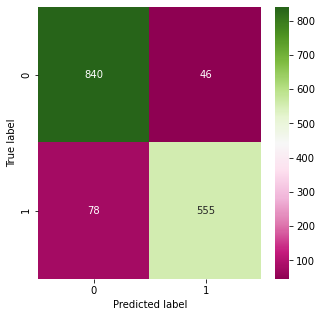

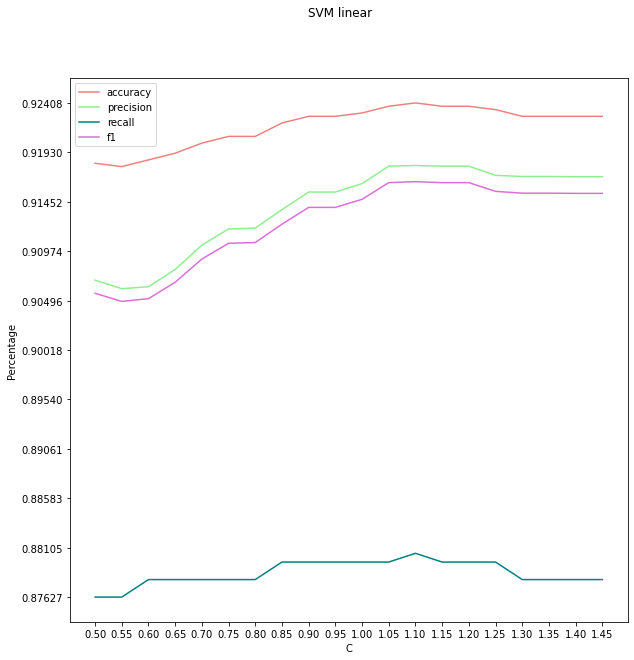

In [71]:
find_right_svm_linear()

<a id="3.2"/></a>
### 3.2 Polynomial

In [72]:
# determine various metric with different hyperparameters to find the best configuration for the classifier
def find_right_svm_poly(emphasy = 0.2):
    # split train set in train and validation
    x_train, x_test, y_train, y_test = train_test_split(DB_tf_idf[DB_tf_idf.columns.difference(["is_spam"])],
                                                    DB_tf_idf["is_spam"], test_size=0.33, random_state=42)
    # vector to plot
    v_precision, v_recall, v_f1, v_accuracy = [], [], [], []
    # degree of error
    C = np.arange(0.5, 1.5, 0.05)
    # degree of polynomial 
    D = range(2, 5, 1)
    for degree_poly in D:
        tmp_precision, tmp_recall, tmp_f1, tmp_accuracy = [], [], [], []
        for c in C:
            # create instance of classificator
            svm_tmp = SVC(C=c, degree=degree_poly, kernel='poly')
            # make a custom scorer for a measure (more enphasy about precision)
            ftwo_scorer = make_scorer(fbeta_score, beta=emphasy)
            # various measures for each distance
            tmp_accuracy.append(cross_val_score(svm_tmp, x_train, y_train, cv=10, scoring='accuracy').mean())
            tmp_precision.append(cross_val_score(svm_tmp, x_train, y_train, cv=10, scoring='precision').mean())
            tmp_recall.append(cross_val_score(svm_tmp, x_train, y_train, cv=10, scoring='recall').mean())
            tmp_f1.append(cross_val_score(svm_tmp, x_train, y_train, cv=10, scoring=ftwo_scorer).mean())
        # add measures to plot vectors
        v_precision.append(tmp_precision)
        v_recall.append(tmp_recall)
        v_f1.append(tmp_f1)
        v_accuracy.append(tmp_accuracy)
    best_result_svm_poly(C, v_accuracy, v_precision, v_recall, v_f1, x_train, x_test, y_train, y_test)
    plot_report_svm_poly(C, D, v_accuracy, v_precision, v_recall, v_f1)
    
    
# plot the results    
def plot_report_svm_poly(C, degree_poly, v_a, v_p, v_r, v_f1):
    # make figure
    fig = plt.figure(constrained_layout=False, figsize=(15, 7*len(degree_poly)))
    # make grid of plots
    gs = fig.add_gridspec(nrows=5+(len(degree_poly)*6), ncols=3)  
    axs= []
    # determine number of subplot
    for i in range(len(degree_poly)):
        axs.append(fig.add_subplot(gs[0+6*i:5+6*i, 0:3]))
    # title of main graphic
    fig.suptitle('SVM poly')
    for i, ax in enumerate(axs): #prima riga
        ax.plot(C, v_a[i], label="accuracy", color="gray")
        ax.plot(C, v_p[i], label="precision", color="lightgreen")
        ax.plot(C, v_r[i], label="recall", color="teal")
        ax.plot(C, v_f1[i], label="f1", color="orchid")
        ax.set_ylabel("Percentage")
        ax.set_xlabel("C")
        ax.set_xticks(C)
        # min of all measures
        compute_min = min(min(v_a[i]), min(v_p[i]), min(v_r[i]), min(v_f1[i]))
        # max of all measures
        compute_max = max(max(v_a[i]), max(v_p[i]), max(v_r[i]), max(v_f1[i]))
        # margin of increment that I want for these graphics
        margin_of_increment = (compute_max - compute_min)/10
        # set margins
        ax.set_yticks(np.arange(compute_min, compute_max+margin_of_increment, margin_of_increment))
        ax.title.set_text(f"Degree {degree_poly[i]}")
        ax.legend()
        
# find the best hyperparameters
def best_result_svm_poly(C, v_a, v_p, v_r, v_f1, x_train, x_test, y_train, y_test):
    # list that contain a pair(C, max_value)
    tmp_max=[]
    for a, f1 in zip(v_a, v_f1):
        # list that hold the sum of all metrics
        tmp_sum = [(x + y)/2 for x, y in zip(a, f1)]
        tmp_max.append((C[tmp_sum.index(max(tmp_sum))], max(tmp_sum)))
    # hold the tupla with the best hyperparameters (metric, C)
    best = (0, 0)
    # hold the best value of tmp_max
    val = 0
    # find the max value and save the right poly degree
    for i, t in enumerate(tmp_max):
        if val < t[1]:
            val = t[1]
            #      degree| pos for vector C
            best = (i+2, t[0])
    # create figure
    f, ax = plt.subplots(1, 1, figsize = (5, 5))
    # create instance of classifier
    svm = SVC(C=best[1], degree=best[0], kernel='poly')
    # train instance
    svm.fit(x_train, y_train)
    # predict the y_hat
    y_hat = svm.predict(x_test)
    # plot confusion matrix
    sn.heatmap(confusion_matrix(y_test, y_hat), annot=True, ax=ax, fmt="d", cmap="PiYG") 
    # define labels name
    ax.set_ylabel("True label")
    ax.set_xlabel("Predicted label")
    # print various metrics
    print("The best hyperparameters are: C ={:.2f}".format(best[1]), "| Degree =", best[0])
    print("METRICS AT THE TEST TIME")
    print("Accuracy: ", accuracy_score(y_hat, y_test))
    print("Precision: ", recall_score(y_hat, y_test))
    print("Recall: ", precision_score(y_hat, y_test))
    print("F1_score: ", f1_score(y_hat, y_test))
    

The best hyperparameters are: C =1.40 | Degree = 2
METRICS AT THE TEST TIME
Accuracy:  0.7899934167215273
Precision:  0.943502824858757
Recall:  0.5276461295418642
F1_score:  0.6767983789260386


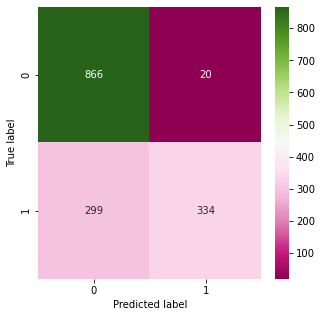

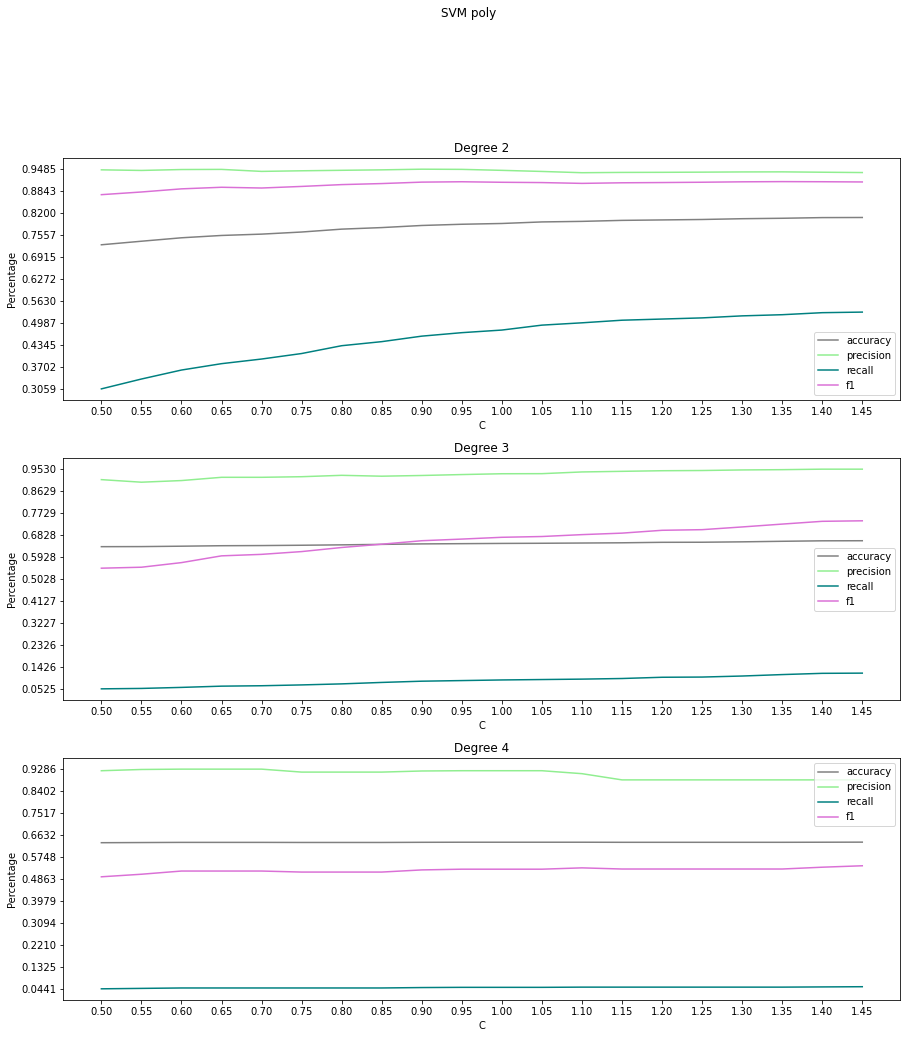

In [73]:
find_right_svm_poly()

<a id="3.3"/></a>
### 3.3 RBF

In [74]:
# determine various metric with different hyperparameters to find the best configuration for the classifier
def find_right_svm_rbf(emphasy = 0.2):
    # split train set in train and validation
    x_train, x_test, y_train, y_test = train_test_split(DB_tf_idf[DB_tf_idf.columns.difference(["is_spam"])],
                                                    DB_tf_idf["is_spam"], test_size=0.33, random_state=42)
    # vector to plot
    v_precision=[]; v_recall=[]; v_f1=[]; v_accuracy=[]
    # C is a hypermeter in SVM to control error
    C = np.arange(0.5, 1.5, 0.05)
    for c in C:
        # create instance of classificator
        svm_tmp = SVC(kernel='rbf', C=c)
        # make a custom scorer for a measure (more enphasy about precision)
        ftwo_scorer = make_scorer(fbeta_score, beta=emphasy)
        # various measures for each distance
        v_accuracy.append(cross_val_score(svm_tmp, x_train, y_train, cv=10, scoring='accuracy').mean())
        v_precision.append(cross_val_score(svm_tmp, x_train, y_train, cv=10, scoring='precision').mean())
        v_recall.append(cross_val_score(svm_tmp, x_train, y_train, cv=10, scoring='recall').mean())
        v_f1.append(cross_val_score(svm_tmp, x_train, y_train, cv=10, scoring=ftwo_scorer).mean())
    best_result_svm_rbf(C, v_accuracy, v_precision, v_recall, v_f1, x_train, x_test, y_train, y_test)
    plot_report_svm_rbf(C, v_accuracy, v_precision, v_recall, v_f1)
    
    
# plot the results    
def plot_report_svm_rbf(C, v_a, v_p, v_r, v_f1):
    # make figure
    fig, ax = plt.subplots(1, 1, figsize = (10, 10))
    # title of main graphic
    fig.suptitle('SVM rbf')
    ax.plot(C, v_a, label="accuracy", color="lightcoral")
    ax.plot(C, v_p, label="precision", color="lightgreen")
    ax.plot(C, v_r, label="recall", color="teal")
    ax.plot(C, v_f1, label="f1", color="orchid")
    ax.set_ylabel("Percentage")
    ax.set_xlabel("C")
    ax.set_xticks(C)
    # min of all measures
    compute_min = min(min(v_a), min(v_p), min(v_r), min(v_f1))
    # max of all measures
    compute_max = max(max(v_a), max(v_p), max(v_r), max(v_f1))
    # margin of increment that I want for these graphics
    margin_of_increment = (compute_max - compute_min)/10
    # set margins
    ax.set_yticks(np.arange(compute_min, compute_max+margin_of_increment, margin_of_increment))
    ax.legend()
        
# find the best hyperparameters
def best_result_svm_rbf(C, v_a, v_p, v_r, v_f1, x_train, x_test, y_train, y_test):
    # list that hold the sum of all metrics
    tmp_sum = [(x + y)/2 for x, y in zip(v_a, v_f1)]
    # list that contain a pair(pos_of_max, max_value)
    best_C = C[tmp_sum.index(max(tmp_sum))]
    # create figure
    f, ax = plt.subplots(1, 1, figsize = (5, 5))
    # create instance of classifier
    svm = SVC(kernel='rbf', C=best_C)
    # train instance
    svm.fit(x_train, y_train)
    # predict the y_hat
    y_hat = svm.predict(x_test)
    # plot confusion matrix
    sn.heatmap(confusion_matrix(y_test, y_hat), annot=True, ax=ax, fmt="d", cmap="PiYG") 
    # define labels name
    ax.set_ylabel("True label")
    ax.set_xlabel("Predicted label")
    # print various metrics
    print("The best hyperparameter is: C = {:.2f}".format(best_C))
    print("METRICS AT THE TEST TIME")
    print("Accuracy: ", accuracy_score(y_hat, y_test))
    print("Precision: ", recall_score(y_hat, y_test))
    print("Recall: ", precision_score(y_hat, y_test))
    print("F1_score: ", f1_score(y_hat, y_test))


The best hyperparameter is: C = 1.45
METRICS AT THE TEST TIME
Accuracy:  0.924292297564187
Precision:  0.9331103678929766
Recall:  0.8815165876777251
F1_score:  0.9065800162469537


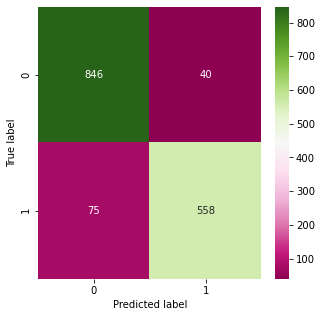

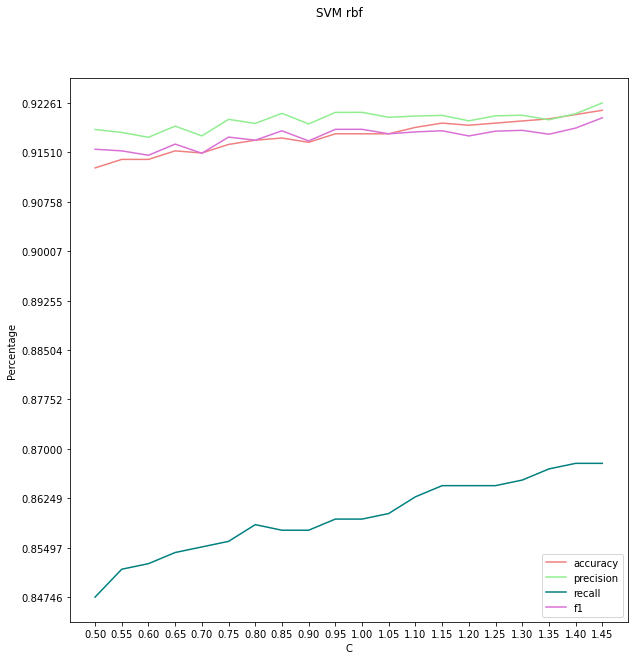

In [75]:
find_right_svm_rbf()

<a id="4"/></a>
## 4 Naive Bayes

In [10]:
# estimator to compute naive Bayes for binary classification
class NaiveBayesB:
    def __init__(self, var_smoothing = 1e-9):
        # dictionary that hold (mean,std) for each class and for each feature
        self.__param_of_distr={}
        # dictionary that hold the probability for each answered classes
        self.__prob_labels={}
        # set that hold the labels
        self.__labels = set()
        # parameters to choose the value of variance to add to the real variance f
        self.__var_smoothing = var_smoothing


    def predict(self, X):
        # holds the answered 
        y_hat = []    
        for row in X.to_numpy():
            y_hat.append(self._compute_prevision(row))
        return y_hat
    
    
    # compute the prevision for each instance
    def _compute_prevision(self, instance):
        from scipy.stats import norm
        # numerator for both
        num_l0, num_l1 = self.__prob_labels[0], self.__prob_labels[1]
        # calculate probability for both classes
        for f, value in enumerate(instance):  
            # calculate numerator for label 0
            num_l0 *= norm.pdf(value, self.__param_of_distr[0][f][0], self.__param_of_distr[0][f][1]) 
            # calculate numerator for label 1
            num_l1 *= norm.pdf(value, self.__param_of_distr[1][f][0], self.__param_of_distr[1][f][1]) 
        # compute Bayes
        # I don’t need the denominator because it is equal for both p0 and p1
        p0, p1 = num_l0, num_l1
        # return the label with maximum probability
        return self.__labels[0] if max(p0, p1) == p0 else self.__labels[1]
        
        
    def fit(self, X, y):
        # take the labels in dataset
        self.__labels = list(set(y))
        # calculate the probability for the two classes
        self.__prob_labels[self.__labels[0]] = len(X[y == self.__labels[0]]) / float(len(X))
        self.__prob_labels[self.__labels[1]] = len(X[y == self.__labels[1]]) / float(len(X))
        # split X in two, one for each class
        separated_class={}
        separated_class[self.__labels[0]] = X[y == self.__labels[0]]
        separated_class[self.__labels[1]] = X[y == self.__labels[1]]
        self._compute_mean_variance(separated_class)
    
    
    # compute mean and deviation for each column and for each class
    def _compute_mean_variance(self, separated_class):
        # inizialize dictionaries
        for l in self.__labels:
            self.__param_of_distr[l] = []
        # watch each column to compute mean and std for each label and for each feature
        # + __var_smoothing is for the case when the std is zero because Gaussian can't get a 0 std deviation
        for col_name in separated_class[self.__labels[0]].columns:
            # compute mean and std for label 0
            tmp_mean=np.mean(separated_class[self.__labels[0]][col_name])
            tmp_std=np.sqrt(np.var(separated_class[self.__labels[0]][col_name]) + self.__var_smoothing)
            self.__param_of_distr[self.__labels[0]].append((tmp_mean, tmp_std))
            # compute mean and std for label 1
            tmp_mean=np.mean(separated_class[self.__labels[1]][col_name])
            tmp_std=np.sqrt(np.var(separated_class[self.__labels[1]][col_name]) + self.__var_smoothing)
            self.__param_of_distr[self.__labels[1]].append((tmp_mean, tmp_std))

            
    # return dictionary where there are parameters of estimator
    def get_params(self, deep = False):
        return {'var_smoothing':self.__var_smoothing}

In [15]:
# determine various metric with different hyperparameters to find the best configuration for the classifier
def find_right_bayes(emphasy = 0.2):
    # split train set in train and validation
    x_train, x_test, y_train, y_test = train_test_split(DB_tf_idf[DB_tf_idf.columns.difference(["is_spam"])],
                                                    DB_tf_idf["is_spam"], test_size=0.33, random_state=42)
    # vector to plot
    v_precision=[]; v_recall=[]; v_f1=[]; v_accuracy=[]
    # Hyperparameter for NaiveBayes
    var_smooth = [1e-9, 5e-9, 1e-8, 5e-8, 1e-7, 1, 2, 3, 4, 5]
    for v in var_smooth:
        # create instance of classificator
        NB_tmp = NaiveBayesB(v)
        # make a custom scorer for a measure (more enphasy about precision)
        ftwo_scorer = make_scorer(fbeta_score, beta=emphasy)
        # various measures for each distance
        v_accuracy.append(cross_val_score(NB_tmp, x_train, y_train, cv=10, scoring='accuracy').mean())
        v_precision.append(cross_val_score(NB_tmp, x_train, y_train, cv=10, scoring='precision').mean())
        v_recall.append(cross_val_score(NB_tmp, x_train, y_train, cv=10, scoring='recall').mean())
        v_f1.append(cross_val_score(NB_tmp, x_train, y_train, cv=10, scoring=ftwo_scorer).mean())
    best_result_bayes(var_smooth, v_accuracy, v_precision, v_recall, v_f1, x_train, x_test, y_train, y_test)
    plot_report_bayes(var_smooth, v_accuracy, v_precision, v_recall, v_f1)
    
    
# plot the results      
def plot_report_bayes(var_smooth, v_a, v_p, v_r, v_f1):
    # make figure
    fig = plt.figure(constrained_layout=False, figsize=(15, 10))
    # make grid of plots
    gs = fig.add_gridspec(nrows=11, ncols=3)  
    # subplot for zoom
    ax_zoom = fig.add_subplot(gs[0:5, 0:1])
    # subplot for main plot
    ax =  fig.add_subplot(gs[6:11, 0:3])
    # title for graph
    fig.suptitle('Naive Bayes')
    # title of subplot
    ax_zoom.set_title("Zoom into")
    # draw lines for main plot
    ax.plot(var_smooth, v_a, label="accuracy", color="lightcoral")
    ax.plot(var_smooth, v_p, label="precision", color="lightgreen")
    ax.plot(var_smooth, v_r, label="recall", color="teal")
    ax.plot(var_smooth, v_f1, label="f1", color="orchid")
    # draw lines for zoom plot
    ax_zoom.plot(var_smooth, v_a, label="accuracy", color="lightcoral")
    ax_zoom.plot(var_smooth, v_p, label="precision", color="lightgreen")
    ax_zoom.plot(var_smooth, v_r, label="recall", color="teal")
    ax_zoom.plot(var_smooth, v_f1, label="f1", color="orchid")
    # set labels of main plot
    ax.set_ylabel("Percentage")
    ax.set_xlabel("Smoothing Variance")
    # min of all measures for main graph
    compute_min = min(min(v_a), min(v_p), min(v_r), min(v_f1))
    # max of all measures for main graph
    compute_max = max(max(v_a), max(v_p), max(v_r), max(v_f1))
    # margin of increment that I want for main plot about y ticks
    margin_of_increment = (compute_max - compute_min)/10
    # set x ticks increment for main plot
    ax.set_xticks([0] + var_smooth[5::])
    # set y ticks increment for main plot
    ax.set_yticks(np.arange(compute_min, compute_max+margin_of_increment, margin_of_increment))
    # sub region of the original image for subplot
    x1, x2, y1, y2 = var_smooth[0], var_smooth[4],min(min(v_a[0:5]), min(v_p[0:5]), min(v_r[0:5]), min(v_f1[0:5])), max(max(v_a[0:5]), max(v_p[0:5]), max(v_r[0:5]), max(v_f1[0:5]))
    # boundary for subplot about original graph
    ax_zoom.set_xlim(x1 , x2)
    ax_zoom.set_ylim(y1 - (y2 - y1) / 5, y2 + (y2 - y1) / 5)
    ax.legend()
    # show funnel
    ax.indicate_inset_zoom(ax_zoom, edgecolor="black")
    

         
# find the best hyperparameters
def best_result_bayes(var_smooth, v_a, v_p, v_r, v_f1, x_train, x_test, y_train, y_test):
    # list that hold the sum of all metrics
    tmp_sum = [(x + y)/2 for x, y in zip(v_a, v_f1)]
    # list that contain a pair(pos_of_max, max_value)
    best_var = var_smooth[tmp_sum.index(max(tmp_sum))]
    # create figure
    f, ax = plt.subplots(1, 1, figsize = (5, 5))
    # create instance of classifier
    NB = NaiveBayesB(best_var)
    # train instance
    NB.fit(x_train, y_train)
    # predict the y_hat
    y_hat = NB.predict(x_test)
    # plot confusion matrix
    sn.heatmap(confusion_matrix(y_test, y_hat), annot=True, ax=ax, fmt="d", cmap="PiYG")    
    # define labels name
    ax.set_ylabel("True label")
    ax.set_xlabel("Predicted label")
    # print various metrics
    print("The best hyperparameter is: Smoothing Variance = {:.9f}".format(best_var))
    print("METRICS AT THE TEST TIME")
    print("Accuracy: ", accuracy_score(y_hat, y_test))
    print("Precision: ", recall_score(y_hat, y_test))
    print("Recall: ", precision_score(y_hat, y_test))
    print("F1_score: ", f1_score(y_hat, y_test))


The best hyperparameter is: Smoothing Variance = 5.000000000
METRICS AT THE TEST TIME
Accuracy:  0.7847267939433838
Precision:  0.9273743016759777
Recall:  0.5244865718799369
F1_score:  0.6700302724520686


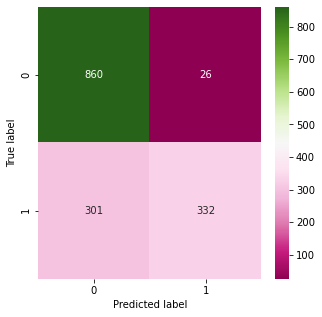

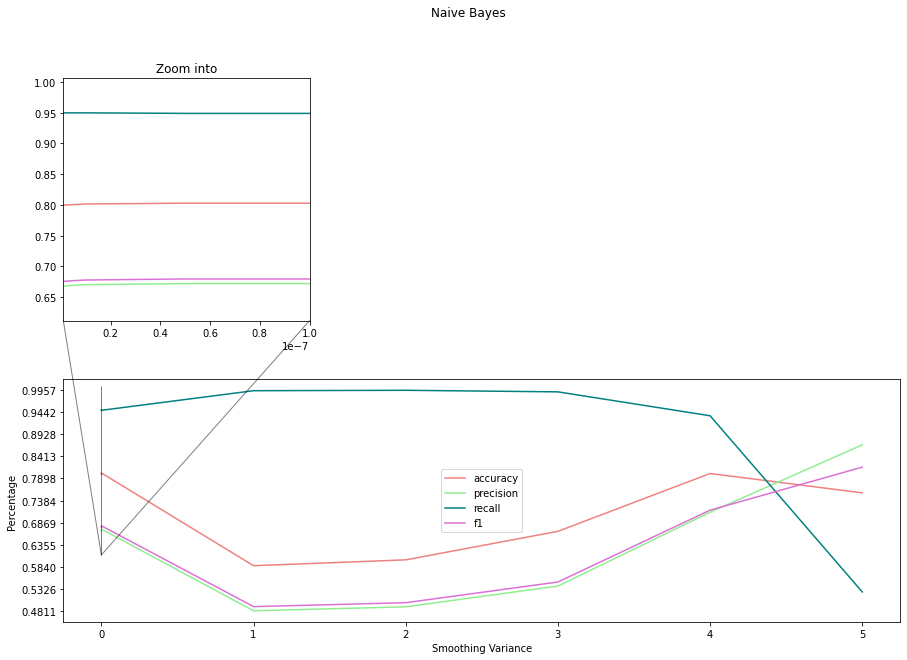

In [16]:
find_right_bayes()

<a id="4.1"/></a>
### 4.1 Visualization of assumptions required from Naive Bayes

I want to see the correlation among variables in case of ham and spam

Correlation in case of spam


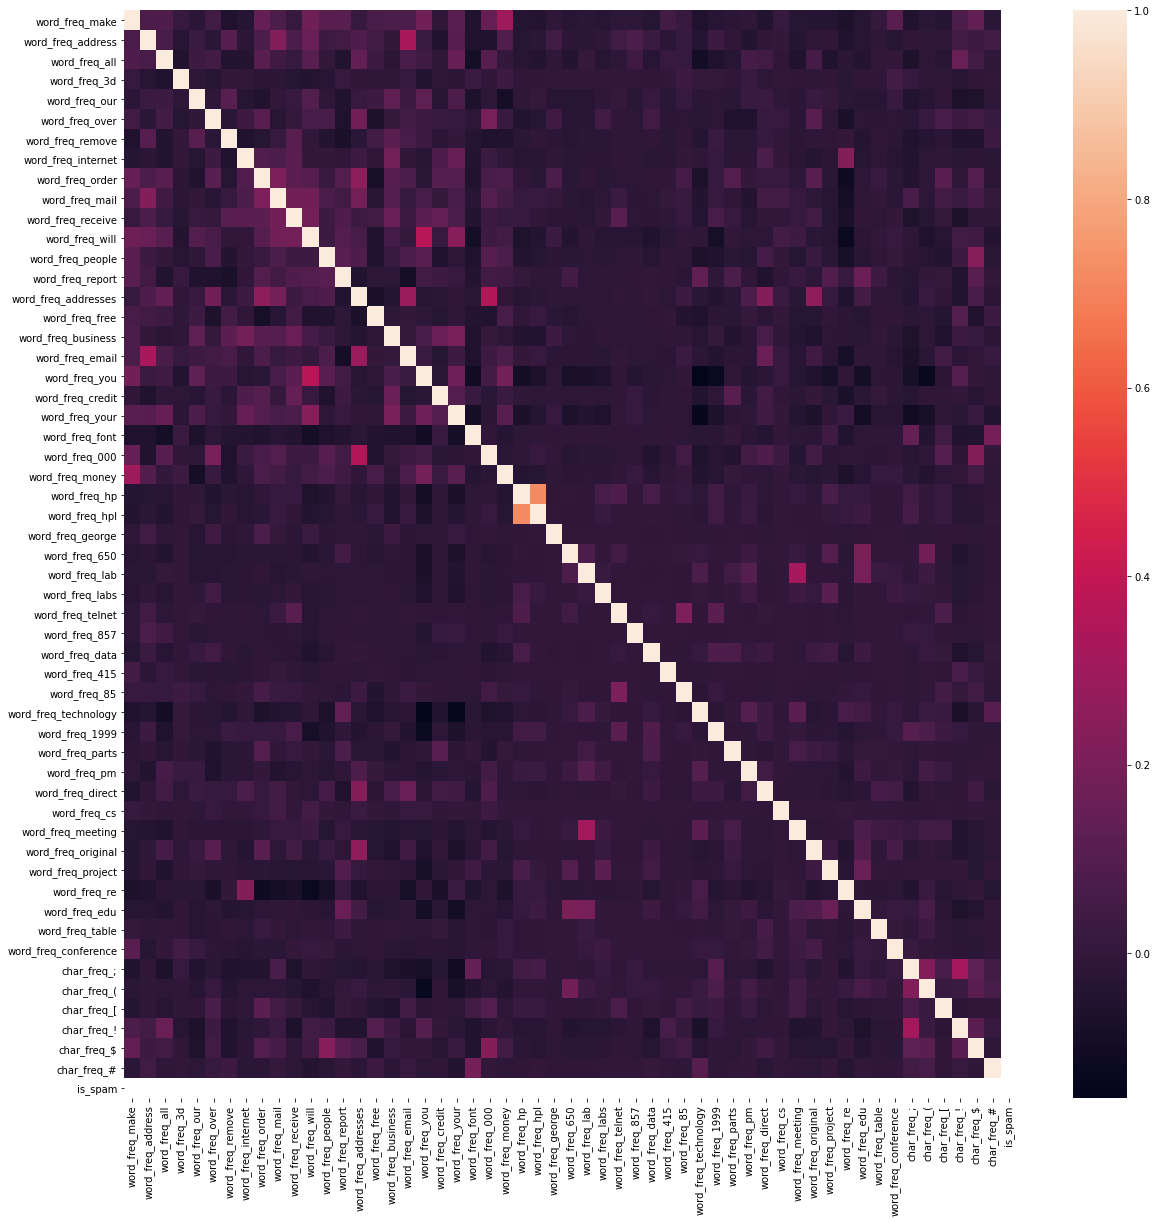

In [9]:
f, ax = plt.subplots(1, 1, figsize = (20, 20))

sn.heatmap((DB_tf_idf[DB_tf_idf["is_spam"] == 1]).corr(), ax=ax)
print("Correlation in case of spam")

Correlation in case of ham


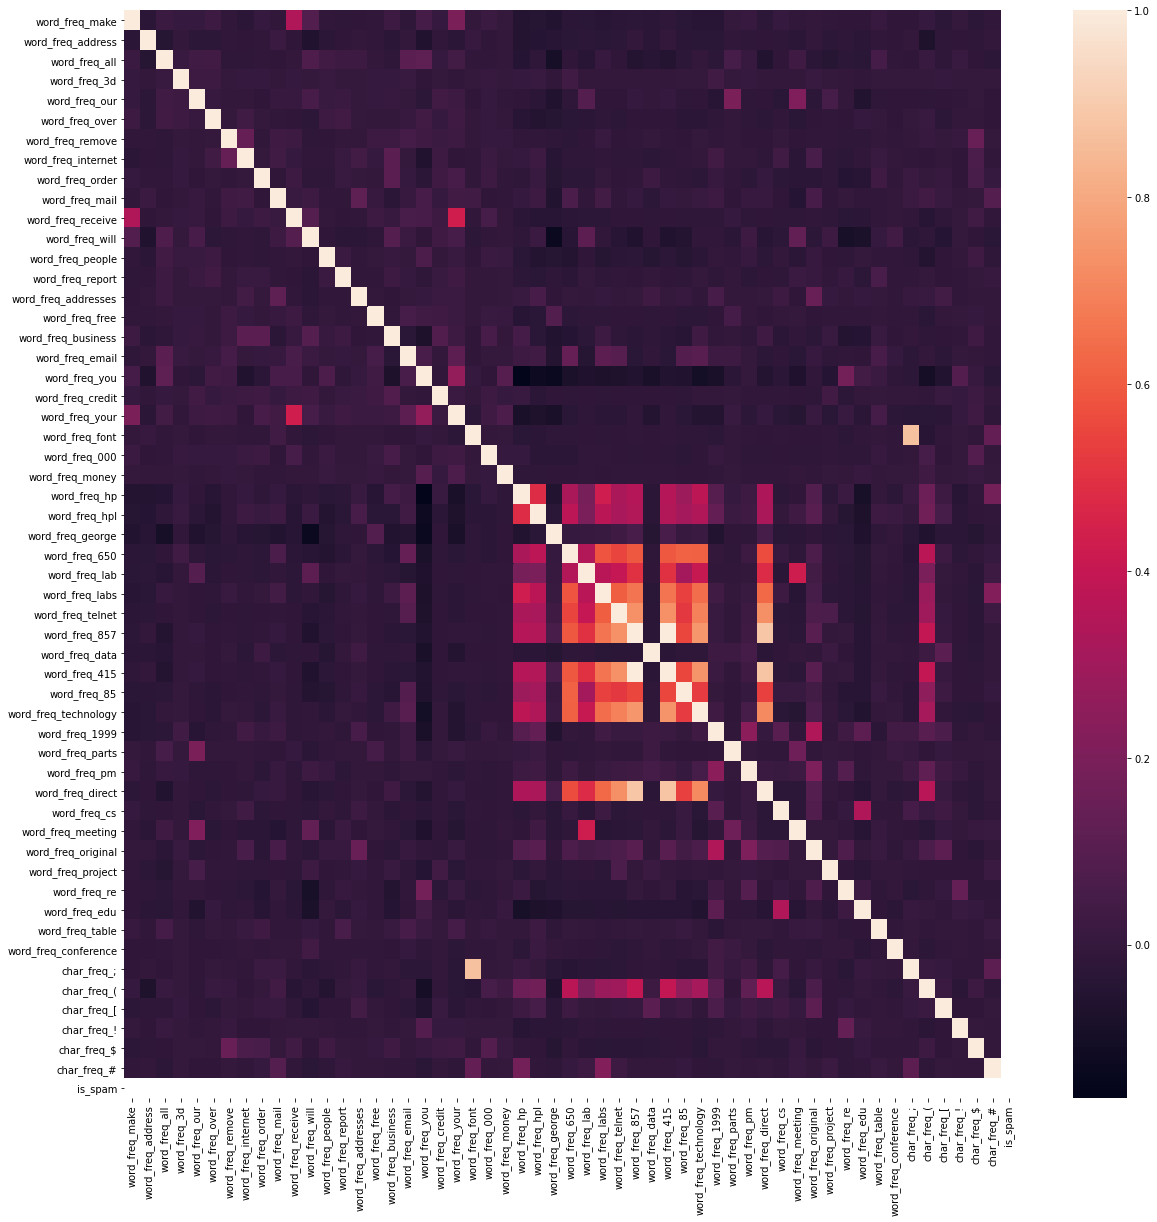

In [8]:
f, ax = plt.subplots(1, 1, figsize = (20, 20))

sn.heatmap((DB_tf_idf[DB_tf_idf["is_spam"] == 0]).corr(), ax=ax)
print("Correlation in case of ham")

I want to see the distribution of conditional variables 

P(X|Y = spam)


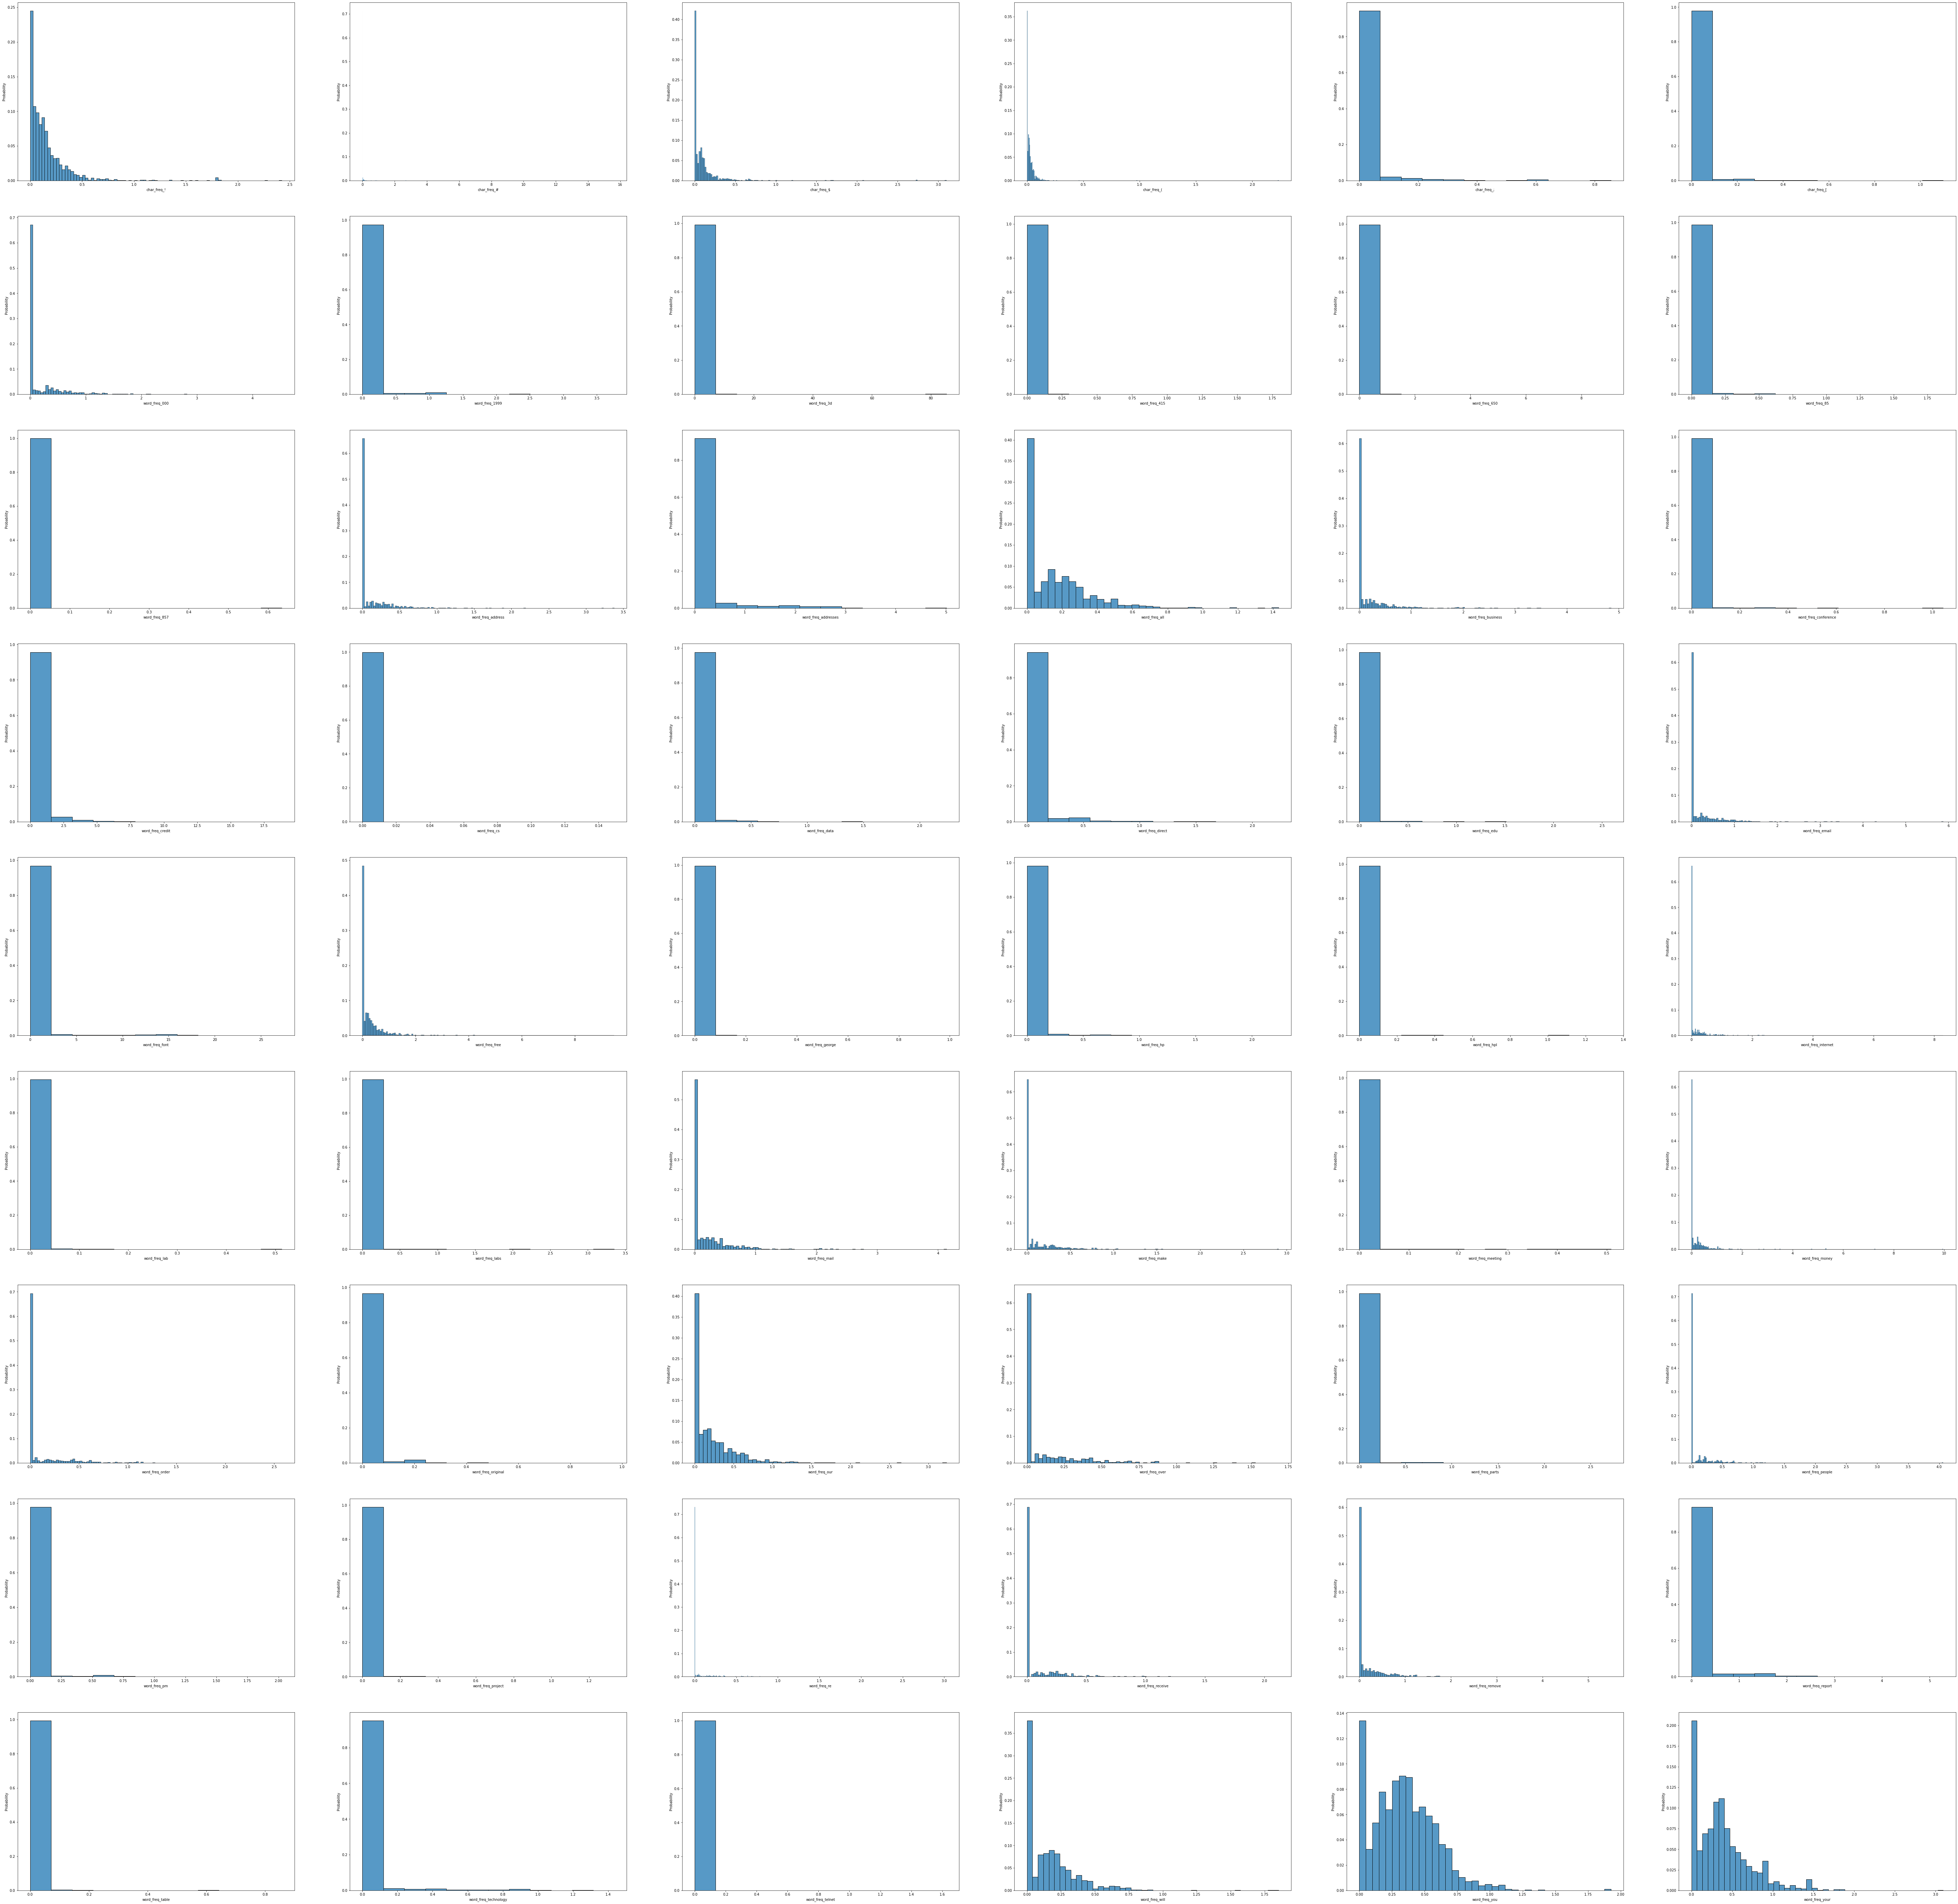

In [11]:
fig, axs = plt.subplots(nrows = 9, ncols = 6, figsize=(100,100))
row_n = 0
col_n = 0
db_spam = DB_tf_idf[DB_tf_idf["is_spam"] == 1]
print("P(X|Y = spam)")
for col in db_spam.columns.difference(["is_spam"]):
    if col_n != 0 and col_n%6==0:
        row_n += 1
    sn.histplot(db_spam[col], stat="probability", ax = axs[row_n, col_n%6])
    col_n += 1

P(X|Y = ham)


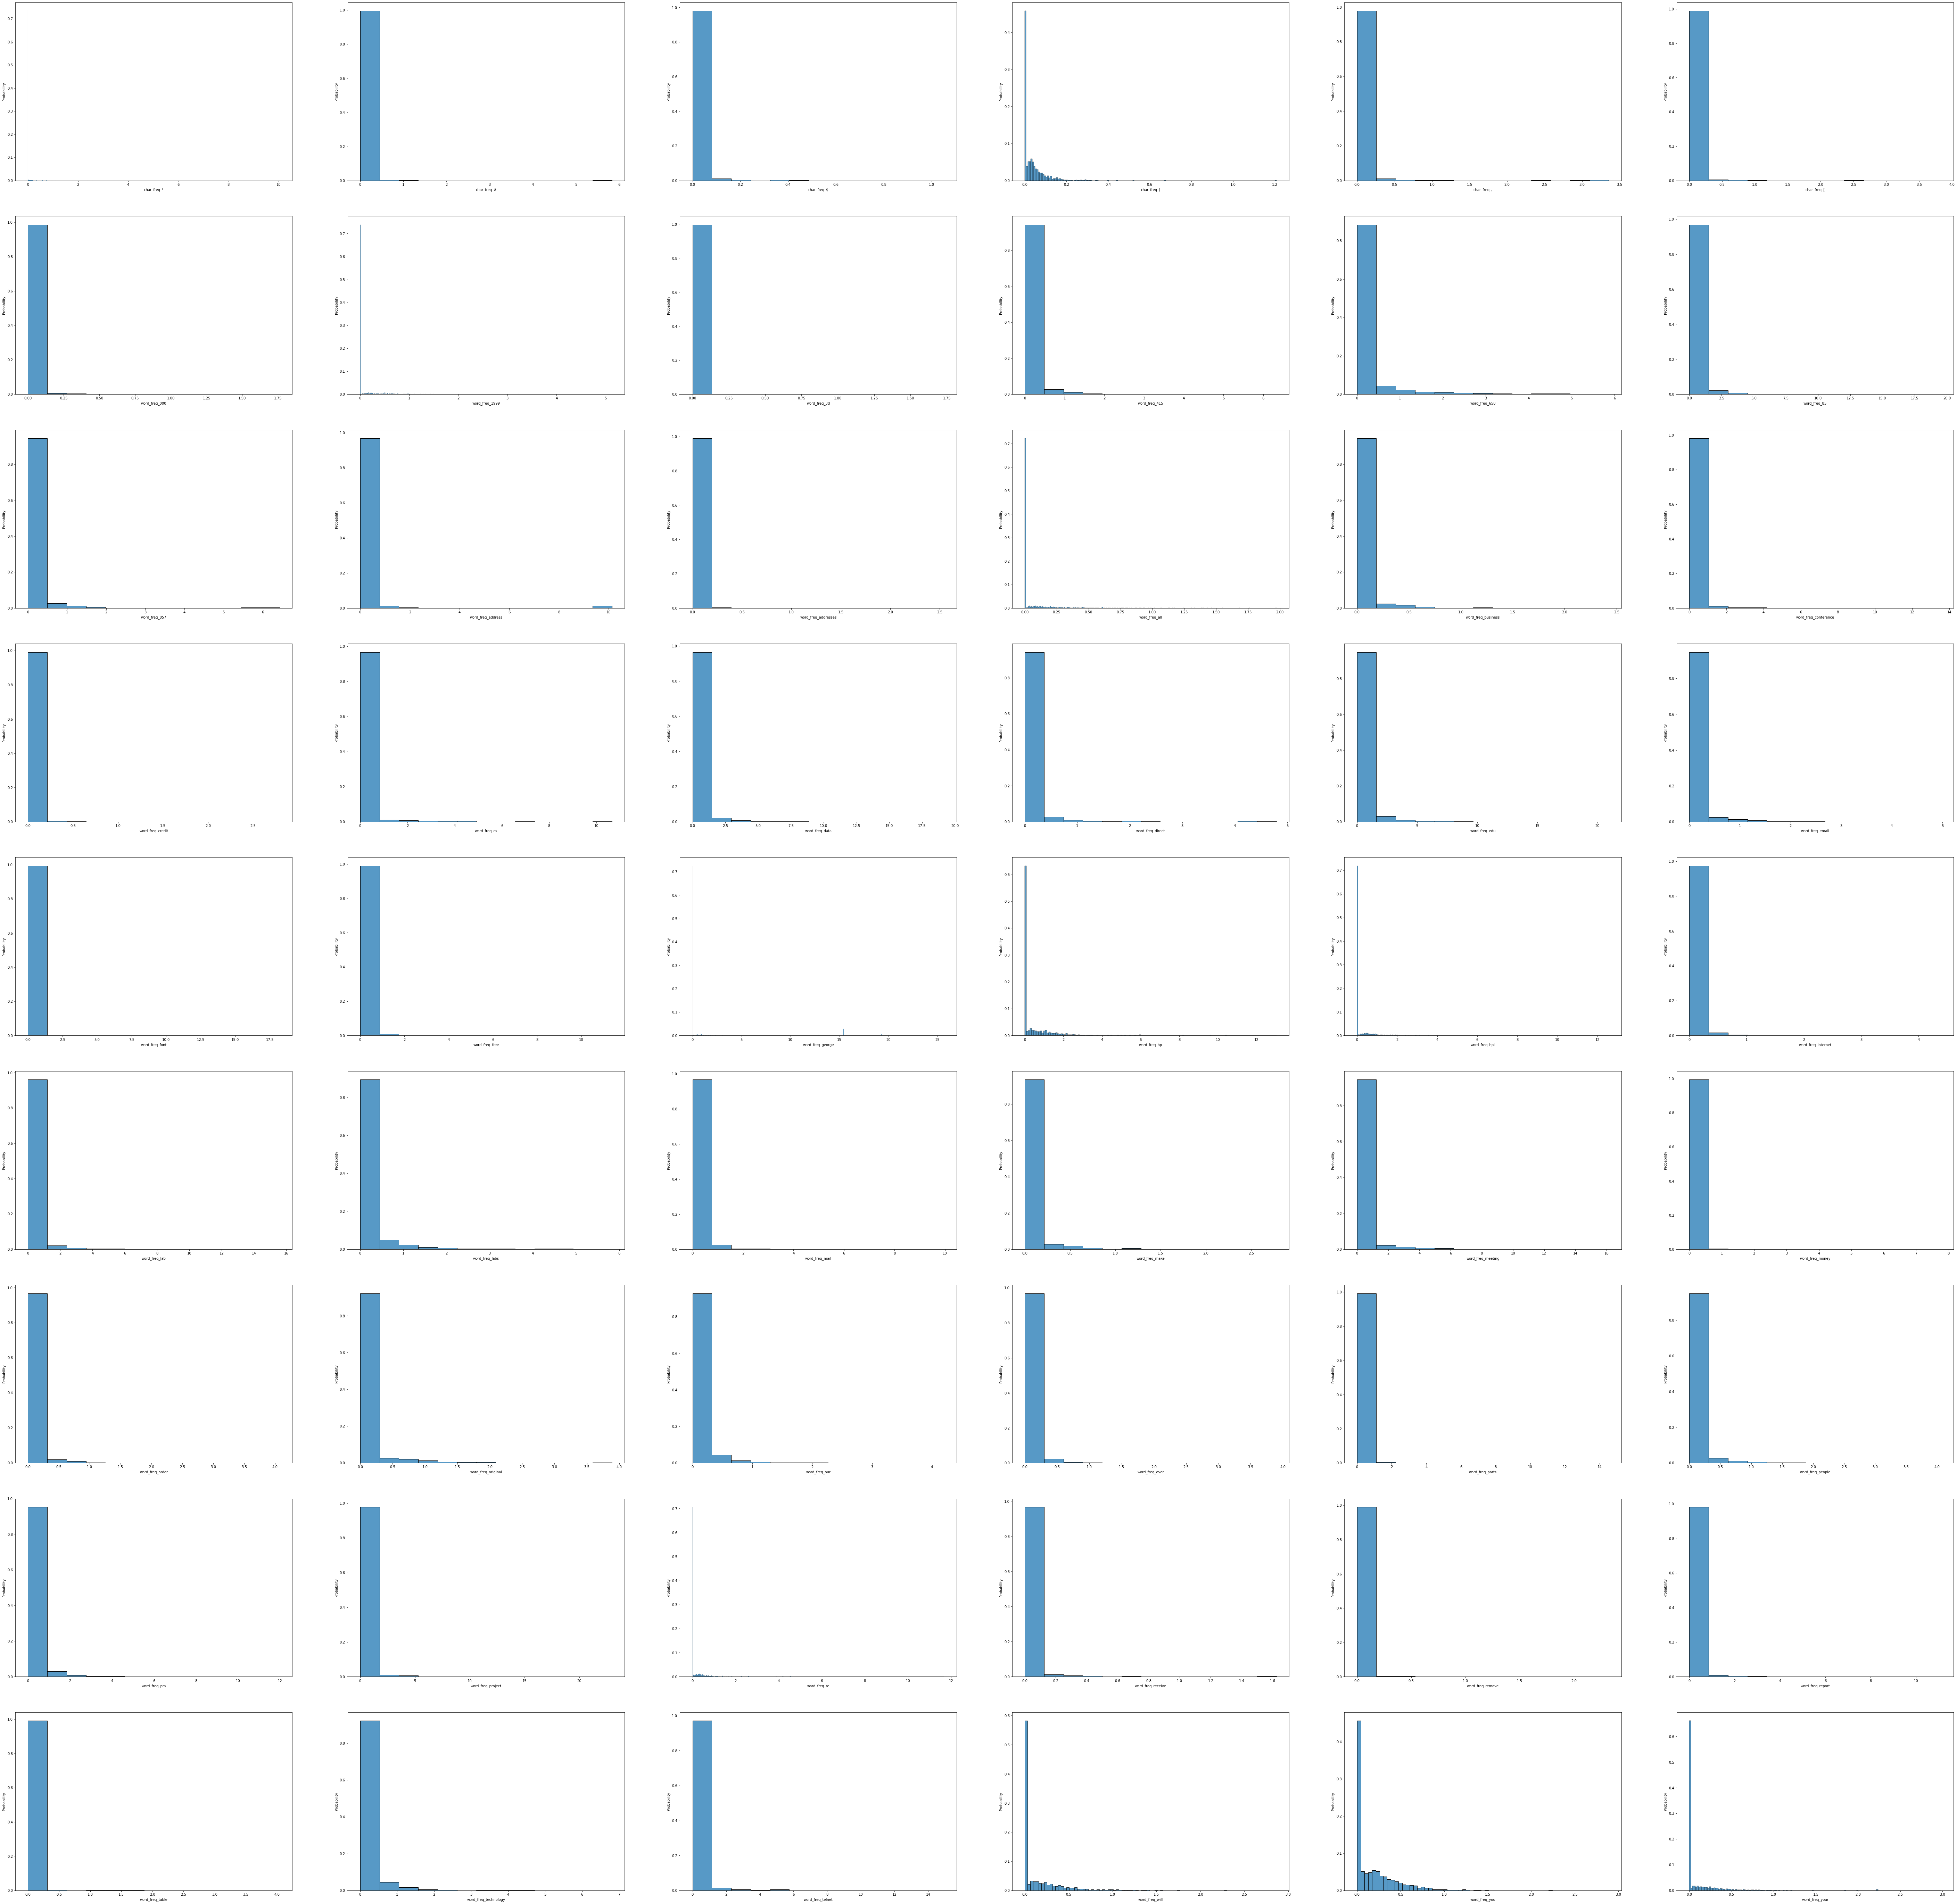

In [12]:
fig, axs = plt.subplots(nrows = 9, ncols = 6, figsize=(100,100))
row_n = 0
col_n = 0
db_no = DB_tf_idf[DB_tf_idf["is_spam"] == 0]
print("P(X|Y = ham)")
for col in db_no.columns.difference(["is_spam"]):
    if col_n != 0 and col_n%6==0:
        row_n += 1
    sn.histplot(db_no[col], stat="probability", ax = axs[row_n, col_n%6])
    col_n += 1